# Welcome to Week 01 Handson
This week handson is a super easy one that is around setting up the basic needed environment for doing the handson lecture, and playing a litle about data exploration. In your machine, you need to setup a python interpreter and pandas library. For completing each milestone, you may use any additional library you want.

### Read dataset "flights.csv"

In [42]:
import pandas as pd # import pandas library

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 100)

# read csv file into 'df' dataframe
df = pd.read_csv('flights.csv', sep = ",")

df.head()

,DayofMonth,DayOfWeek,Carrier,OriginAirportID,DestAirportID,DepDelay,ArrDelay
0,19,5,DL,11433,13303,-3,1
1,19,5,DL,14869,12478,0,-8
2,19,5,DL,14057,14869,-4,-15
3,19,5,DL,15016,11433,28,24
4,19,5,DL,11193,12892,-6,-11


## Milestone 01 (M01)
Take the unique values of ```OriginaAirportID``` and ```DestAirportID``` column data and save them into variables. For these both variables, please output: (i) several/sample values of them, and (ii) the number of their unique values. 

In [43]:
# write your own code for M01 here
# Sampling
df['OriginAirportID'].sample(n=3, random_state=1)

229075     14107
934160     12478
2227794    12264
Name: OriginAirportID, dtype: int64

In [44]:
# Sampling
df['DestAirportID'].sample(n=3, random_state=1)

229075     10397
934160     12954
2227794    13851
Name: DestAirportID, dtype: int64

In [45]:
# Unique IDs
df['OriginAirportID'].nunique()

70

In [46]:
# Unique IDs
df['DestAirportID'].nunique()

70

## M02
Discretize ```DepDelay``` and ```ArrDelay``` column data into several ranges of values (any number you think good), and plot the histogram of the both.

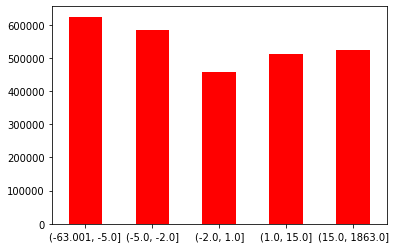

In [47]:
# write your own code for M02 here
depDelayQcut = pd.qcut(df['DepDelay'], 5)
ax = depDelayQcut.value_counts(sort=False).plot.bar(rot=0, color="r", figsize=(6,4))


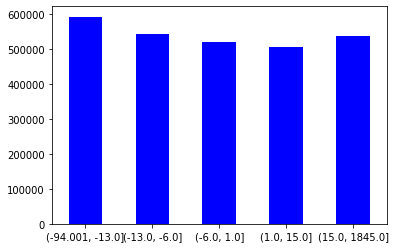

In [48]:
arrDelayQcut = pd.qcut(df['ArrDelay'], 5)
ax2 = arrDelayQcut.value_counts(sort=False).plot.bar(rot=0, color="b", figsize=(6,4))

## M03
Plot the original values of ```DepDelay``` and ```ArrDelay``` column data into box plots and please explain what you can interpret from them.

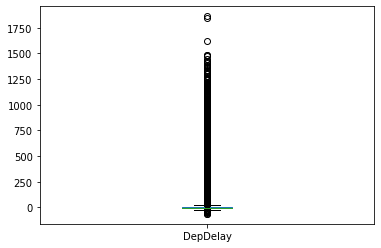

In [49]:
# write your own code for M03 here
df['DepDelay'].plot.box()



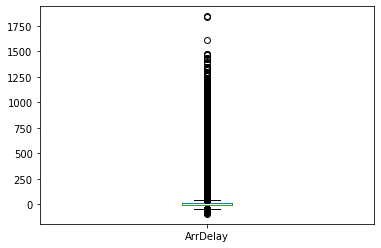

In [50]:
df['ArrDelay'].plot.box()

### Interpretation
- Both DepDelay and Arr Delay has a similar box plot trend
- Data distribution is tighter (denser/less varying) at values near 0 and the negatives
- There's a slight jump/gap in data distribution from around < 1500 to > 1500 and to > 1750

## M04
Before building a model, we can investigate the relation among the features (and also the output). We may later remove the higly correlated features (keep only one) and/or features having no correlation with the output. Thus, in this milestone, you are asked to plot correlation matrix (see [this example](https://miro.medium.com/max/1155/1*ObHerhSsFvFV6hLSgLMYHg.jpeg)). Please explain (in short) what you can interpret from the correlation matrix you create.

In [51]:
# write your own code for M04 here
import seaborn as sns

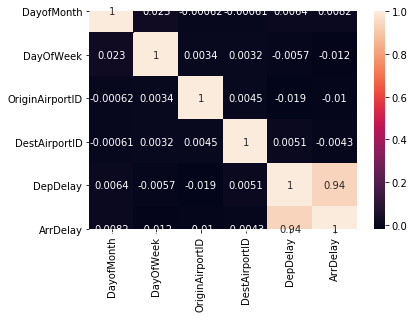

In [52]:
    sns.heatmap(df.corr(), annot = True)

### Interpretation
ArrDelay and DepDelay has the correlation value of 0.94 which is very high. Therefore either one of them can be safely removed.


# Submission
Please submit this jupter notebook file to the course portal. Make sure the saved file has cell outputs for each milestone (not empty). 

# Welcome to Week 02 Handson - Data Preprocessing #01
In this hands-on session, we will learn some basic data pre-processings, which include:
1. duplicated data handling,
2. missing value handling,
3. data transformation (scalling and converting 'categorical data' to 'numerical data'),
4. outliers removal (for data preprocessing).

## Read dataset "raw-flight-data.csv"

In [2]:
import pandas as pd
# start: py -m notebook

# read csv file into 'df' dataframe
df = pd.read_csv('./raw-flight-data.csv', sep = ",")

# print some data rows
df.head()

,DayofMonth,DayOfWeek,Carrier,OriginAirportID,DestAirportID,DepDelay,ArrDelay
0,19,5,DL,11433,13303,-3.0,1.0
1,19,5,DL,14869,12478,0.0,-8.0
2,19,5,DL,14057,14869,-4.0,-15.0
3,19,5,DL,15016,11433,28.0,24.0
4,19,5,DL,11193,12892,-6.0,-11.0


## Milestone 01 (M01)
The given dataset is still a 'raw dataset' with duplicated data and missing values,<br>
1. In M01, please delete the duplicated data (keep only one) and return a dataframe with no duplicated data. **Hint:** use pandas API to handle the duplicated data,<br>
2. Print how many duplicated data (that are removed). **Hint:** calculate the difference of row numbers, before and after duplicate removal.

In [3]:
# write you own code for M01 here
old_row_num = len(df)
m1_df = df.drop_duplicates(keep="first", inplace=False)
new_row_num = len(m1_df)

print('Duplicate Rows Removal')
print("Before: ", old_row_num)
print("After: ", new_row_num)
print("Diff: ", old_row_num-new_row_num)

Duplicate Rows Removal
Before:  2719418
After:  2696983
Diff:  22435


## M02
In M02, we will handle data rows having missing values. **Note:** in the given dataset, the missing values are only in the columns of ```DepDelay``` and ```ArrDelay```.
1. First and naive approach is by deleting the data rows having missing value. From data in M01, use pandas API to remove data rows with 'missing value', with specifications: (i) column subset to be checked = ```DepDelay``` and ```ArrDelay```, (ii) delete the data rows with **at least one missing value** in the given subset in (i),
2. Print the number missing rows from (1),
3. Another approach to handle missing values is by filling those missing values by their corresponding mean values, most frequent values, interpolated values, etc. In this M02, fill the missing values in the columns of ```DepDelay``` and ```ArrDelay``` by their corresponding mean values.
4. Perform 'drop missing value', similar to (1), to the result of (3). Calculate the difference of row numbers before and after. You should get '0' for this. 
5. In your opinion, what are the differences between those two techniques (delete missing values vs filling with mean values)? Which one do you prefer? Please explain your argument.

In [4]:
# write you own code for M02 here
m2_df_1 = m1_df.dropna(axis=0, # delete row 
            how='any', # if one of them is missing, drop
            subset=['DepDelay', 'ArrDelay'], #columns to be deleted
            inplace= False)
print('Missing row numbers:', len(m1_df) - len(m2_df_1))

Missing row numbers: 23798


In [5]:
# m2_df_3[['DepDelay', 'ArrDelay']] = m1_df[['DepDelay', 'ArrDelay']].fillna(value=df.mean())
m2_df_3 = m1_df.fillna(value=df.mean(numeric_only=True))
m2_df_4 = m2_df_3.dropna(axis=0, # delete row 
            how='any', # if one of them is missing, drop
            subset=['DepDelay', 'ArrDelay'], #columns to be deleted
            inplace= False)
print("4. Difference: ", len(m2_df_3) - len(m2_df_4))

4. Difference:  0


Before deciding whether to remove or replace/impute the missing data we have to understand the reason why data goes missing:
If MAR(missing at random) or MCAR(missing completely at random) then dropping is generally considered safe depending upon their occurrences. On the other hand if MNAR(missing not at random) then removing observations with missing values can produce a bias in the model.

Other than that:

Replacing/imputation is more appropriate if the percentage of missing data is low. If the portion of missing data is too high, the results lack natural variation that could result in an effective model.
Removing data is more appropriate when dealing with data that is missing at random, related data can be deleted to reduce bias. Removing data may not be the best option if there are not enough observations to result in a reliable analysis.

For this case:

Because the missing value percentage is only 0.88% (23798 rows), it's safe to replace/impute them.

## M03
There is a 'Carrier' column in the given dataset, which is a "categorical variable". 
1. To build a learning model, what we need is numerical data so that our data can be processed by the learning model. Please convert the "categorical valriable" in the column of "Carrier" to "numerical variable". E.g., given categorical variable values of [A, B, A, C], we expect to get [0, 1, 0, 2] or [1, 2, 1, 3]. Thus, a row with the column value of "A", its value should be replaced with "0" (if you use this --> [0, 1, 0, 2]) or "1" (if you use this --> [1, 2, 1, 3]).

In [6]:
# write you own code for M03 here
numerical_carrier = pd.factorize(m2_df_4['Carrier'])[0] # only take the labels, [1] is the unique columns value
print(numerical_carrier)
# pd.factorize(['A','B','A','C'])[0]

[0 0 0 ... 0 0 0]


## M04
In some learning methods, we may perform data transformations so that we can expect a better performance (accuracy). One of the popular data transformation is **scalling**. Please do scalling the data column of "DepDelay" to [-1, 1]. <br>
**Hint:** In this hands-on session, don't use libary to do scalling, we expect you use scalling formula of:<br><br>
$$ \widehat{X} = \frac{(X-X_{min}) \times (BA - BB)}{X_{max}-X_{min}} + BB,$$ <br>
Where:<br>
$
\begin{align}
    \widehat{X} &= \text{scalled value}\\
    X &= \text{value being scalled}\\
    X_{max}, X_{min} &= \text{max of } X \text{, min of }X\\
    BA &= \text{batas atas, untuk kasus kita adalah 1}\\
    BB &= \text{batas bawah, untuk kasus kita adalah -1}\\
\end{align}
$

In [7]:
# write you own code for M04 here
def scaling(X, Xmax, Xmin, BA, BB):
    return ((X-Xmin) * (BA-BB) / (Xmax-Xmin) + BB)

Xmax = m2_df_4['DepDelay'].max()
Xmin = m2_df_4['DepDelay'].min()

m2_df_4['DepDelay'] = scaling(m2_df_4['DepDelay'], Xmax, Xmin, 1, -1)

df[['DepDelay']]

,DepDelay
0,-3.0
1,0.0
2,-4.0
3,28.0
4,-6.0
...,...
2719413,1.0
2719414,-2.0
2719415,18.0
2719416,10.0


## M05
In raw data, there may be outliers and they should be removed before we use our data to our learning model. There are several approaches and one of them is by using Interquartile Range (IQR). The IQR can be used to identify outliers by defining limits on the sample values that are: (i) a factor $k$ of the IQR **below** the 25th percentile (Q1), **or** (ii) a factor $k$ of the IQR **above** the 75th percentile (Q3). The common value for the factor $k$ is the value 1.5 (thus, the outliers condition is below $(Q1 - 1.5 * IQR)$ or above $(Q3 + 1.5 * IQR)$). A factor $k$ of 3 or more can be used to identify values that are extreme outliers (far outs).

In M05, use the column ```ArrDelay``` to filter out the outliers data with $k=1.5$ and one more $k$ value you think it's a good value to filter out the outliers. Please also: (i) print the value of $Q1, Q3, IQR, (Q1 - k * IQR), (Q3 + k * IQR)$ and (ii) count how many outliers you successfully remove by using $k=1.5$ and the other $k$ you choose.

In [19]:
# Outlier removal with ICR:
def DetectOutliers(df, k):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3-Q1
    outlier_floor = Q1 - k * IQR
    outlier_ceil = Q3 + k * IQR
    print("k:", k)
    print("Q1:", Q1)
    print("Q3:", Q3)
    print("IQR:", IQR)
    print("(𝑄1−𝑘∗𝐼𝑄𝑅):", outlier_floor)
    print("(𝑄3+𝑘∗𝐼𝑄𝑅):", outlier_ceil)
    return ((df < outlier_floor) | (df > outlier_ceil)).sum()

print("Outliers removed:", DetectOutliers(m2_df_4['ArrDelay'], 1.5))


k: 1.5
Q1: -11.0
Q3: 10.0
IQR: 21.0
(𝑄1−𝑘∗𝐼𝑄𝑅): -42.5
(𝑄3+𝑘∗𝐼𝑄𝑅): 41.5
Outliers removed: 254931


k: 12
Q1: -11.0
Q3: 10.0
IQR: 21.0
(𝑄1−𝑘∗𝐼𝑄𝑅): -263.0
(𝑄3+𝑘∗𝐼𝑄𝑅): 262.0
Outliers removed: 6922


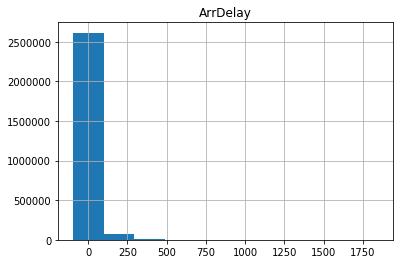

In [24]:
m2_df_4.hist(column='ArrDelay')
print("Outliers removed:", DetectOutliers(m2_df_4['ArrDelay'], 12))

### k=12 reason
After plotting the data distribution of ArrDelay, I felt that k=1.5 will result in a range that is too tight and would then remove a considerable number of data that should be valid in terms of variation. I figured that up until the data value of <= 260 should still be accepted. Therefore, k=12 is the perfect fit for this as it brings the (𝑄3+𝑘∗𝐼𝑄𝑅) limit into 262, thus accepting data values below that.

# Submission 
Submit this ipynb file to course portal similar to what you have done in the Week 01 Handson.

Author: Abel Stanley

NIM: 13517068

# Week 03 Handson - Data Preprocessing #02

To use a learning model, we need to input numerical data to the model. However, we often
get non-numerical data as input, e.g., text data. Thus, to use text as input to the learning
model, we need to do pre-processing and convert it to numerical data.


Steps below are typical pre-processing steps for text data.

1. Tokenization

2. Normalization

3. Cleaning

4. Lemmatization/stemming
Tokenization

## Tokenization

In [39]:
import nltk
from nltk.tokenize import word_tokenize

# we have two raw texts here that we want to pre-process
text1 = "After watching two hours non stop, \
he says that the film is really fantastic #brilliant."
text2 = "Foods sold there are little bit pricy, \
meanwhile the taste is not delicious #notrecommended. "

tokens1 = word_tokenize(text1)
print("tokens1:\n", tokens1)
tokens2 = word_tokenize(text2)
print("\n\ntokens2:\n", tokens2)

tokens1:
 ['After', 'watching', 'two', 'hours', 'non', 'stop', ',', 'he', 'says', 'that', 'the', 'film', 'is', 'really', 'fantastic', '#', 'brilliant', '.']


tokens2:
 ['Foods', 'sold', 'there', 'are', 'little', 'bit', 'pricy', ',', 'meanwhile', 'the', 'taste', 'is', 'not', 'delicious', '#', 'notrecommended', '.']


## Normalization

In this block of code, we try one of normalization processes: converting to lowercase.

In [40]:
# convert to Lower case
normalized_words1 = [w.lower() for w in tokens1]
print("normalized words1:\n", normalized_words1)
## Normalization
normalized_words2 = [w.lower() for w in tokens2]
print("\n\nnormalized words2:\n", normalized_words2)

normalized words1:
 ['after', 'watching', 'two', 'hours', 'non', 'stop', ',', 'he', 'says', 'that', 'the', 'film', 'is', 'really', 'fantastic', '#', 'brilliant', '.']


normalized words2:
 ['foods', 'sold', 'there', 'are', 'little', 'bit', 'pricy', ',', 'meanwhile', 'the', 'taste', 'is', 'not', 'delicious', '#', 'notrecommended', '.']


### Cleaning 01: remove punctuation

In [41]:
# remove punctuation from each word
import string
table = str.maketrans('', '', string.punctuation)
punc_removed1 = [w.translate(table) for w in normalized_words1]
print("punc_removedi:\n", punc_removed1)
punc_removed2 = [w.translate(table) for w in normalized_words2]
print("\n\npunc_removed2:\n", punc_removed2)

punc_removedi:
 ['after', 'watching', 'two', 'hours', 'non', 'stop', '', 'he', 'says', 'that', 'the', 'film', 'is', 'really', 'fantastic', '', 'brilliant', '']


punc_removed2:
 ['foods', 'sold', 'there', 'are', 'little', 'bit', 'pricy', '', 'meanwhile', 'the', 'taste', 'is', 'not', 'delicious', '', 'notrecommended', '']


### Cleaning 02: remove not alphabetic

In [42]:
# remove remaining tokens that are not alphabetic
isalpha_words1 = [word for word in punc_removed1 if word.isalpha() ]
print("isalpha_words1:\n", isalpha_words1)
isalpha_words2 = [word for word in punc_removed2 if word.isalpha() ]
print("\n\nisalpha_words2:\n", isalpha_words2)

isalpha_words1:
 ['after', 'watching', 'two', 'hours', 'non', 'stop', 'he', 'says', 'that', 'the', 'film', 'is', 'really', 'fantastic', 'brilliant']


isalpha_words2:
 ['foods', 'sold', 'there', 'are', 'little', 'bit', 'pricy', 'meanwhile', 'the', 'taste', 'is', 'not', 'delicious', 'notrecommended']


### Cleaning 03: remove stop words

In [43]:
# filter out stop words
from nltk.corpus import stopwords
# nltk.download('stopwords')

stop_words = set(stopwords.words('english' ))
#print("stop words:\n", stop words, "\n") #print this tf you want
#to see stop word exampLes
stopWords_removed1 = [w for w in isalpha_words1 if not w in stop_words ]
print("stopWords removedi:\n", stopWords_removed1)
stopWords_removed2 = [w for w in isalpha_words2 if not w in stop_words ]
print("\n\nstopWords removed2:\n", stopWords_removed2)

stopWords removedi:
 ['watching', 'two', 'hours', 'non', 'stop', 'says', 'film', 'really', 'fantastic', 'brilliant']


stopWords removed2:
 ['foods', 'sold', 'little', 'bit', 'pricy', 'meanwhile', 'taste', 'delicious', 'notrecommended']


## Stemming

In [44]:
from nltk.stem import PorterStemmer

ps = PorterStemmer()
stemmed_word1 = [ps.stem(w) for w in stopWords_removed1 ]
print("stemmed_word1:\n", stemmed_word1)
stemmed_word2 = [ps.stem(w) for w in stopWords_removed2 ]
print("\n\nstemmed_word2:\n", stemmed_word2)

stemmed_word1:
 ['watch', 'two', 'hour', 'non', 'stop', 'say', 'film', 'realli', 'fantast', 'brilliant']


stemmed_word2:
 ['food', 'sold', 'littl', 'bit', 'prici', 'meanwhil', 'tast', 'delici', 'notrecommend']


## Lemmatization

In [45]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
lemmatized_words1 = [lemmatizer.lemmatize(w) for w in stopWords_removed1]
print("“lemmatized_words1:\n", lemmatized_words1)
lemmatized_words2 = [lemmatizer.lemmatize(w) for w in stopWords_removed2]
print("\n\nlemmatized_words2:\n", lemmatized_words2)

“lemmatized_words1:
 ['watching', 'two', 'hour', 'non', 'stop', 'say', 'film', 'really', 'fantastic', 'brilliant']


lemmatized_words2:
 ['food', 'sold', 'little', 'bit', 'pricy', 'meanwhile', 'taste', 'delicious', 'notrecommended']


## Example of Converting Preprocessed Text into

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer

# merge two texts into one List (you may also try to use the stemmed_word)
two_preprocessed_txt = [lemmatized_words1, lemmatized_words2 ]
# define the tfidf vectorizer
def dummy(doc):
    return doc
                         
tfidf = TfidfVectorizer(
    analyzer='word', #''
    tokenizer=dummy ,
    preprocessor=dummy,
    token_pattern=None )
                         
# train / learn from the given data
model = tfidf.fit(two_preprocessed_txt)
# transform to numerical features using the trained model
numerical_features = model.transform(two_preprocessed_txt).toarray()
''' 
    ==> these numerical features can then be used by the model,
    e.g., for classification to sentiment class: positive and negative
'''
                         
print("numerical features of text1:\n", numerical_features[0],
"; shape:", numerical_features[0].shape)
print("\n\nnumerical features of text2:\n", numerical_features[1],
"; shape:", numerical_features[1].shape)

numerical features of text1:
 [0.         0.31622777 0.         0.31622777 0.31622777 0.
 0.31622777 0.         0.         0.31622777 0.         0.
 0.31622777 0.31622777 0.         0.31622777 0.         0.31622777
 0.31622777] ; shape: (19,)


numerical features of text2:
 [0.33333333 0.         0.33333333 0.         0.         0.33333333
 0.         0.33333333 0.33333333 0.         0.33333333 0.33333333
 0.         0.         0.33333333 0.         0.33333333 0.
 0.        ] ; shape: (19,)


#  Question 01 (Q01)

a. What are tokenization, normalization and cleaning?

b. What is/are the difference(s) between stemming and lemmatization?

### Answer:

#### a. What are tokenization, normalization and cleaning?
##### Tokenization
Tokenization is the process of converting text into tokens before transforming it into vectors. It is also easier to filter out unnecessary tokens. For example, a document into paragraphs or sentences into words.


#### Normalization
Normalization consists of the translation (mapping) of terms in the scheme or linguistic reductions through stemming, lemmatization and other forms of standardization.

Words which look different due to casing or written another way but are the same in meaning need to be process correctly. Normalisation processes ensure that these words are treated equally. For example, changing numbers to their word equivalents or converting the casing of all the text.

#### Cleaning
The cleaning process consists of getting rid of the less useful parts of text through stop-word removal, dealing with capitalization and characters and other details.

#### b. What is/are the difference(s) between stemming and lemmatization?

##### 1. The main difference is the way they work and the result that each of them returns:

        Stemming algorithms work by cutting off the end or the beginning of the word, taking into account a list of common prefixes and suffixes that can be found in an inflected word. This indiscriminate cutting can be successful in some occasions, but not always, and that is why we affirm that this approach presents some limitations. Below we illustrate the method with examples in both English and Spanish.
    
        Lemmatization, on the other hand, takes into consideration the morphological analysis of the words. To do so, it is necessary to have detailed dictionaries which the algorithm can look through to link the form back to its lemma. Again, you can see how it works with the same example words.
    
##### 2. A lemma is the base form of all its inflectional forms, whereas a stem isn’t. This is why regular dictionaries are lists of lemmas, not stems. This has two consequences:
    
        First, the stem can be the same for the inflectional forms of different lemmas. This translates into noise in our search results. In fact, it is very common to find entire forms as instances of several lemmas.

        Also, the same lemma can correspond to forms with different stems, and we need to treat them as the same word. For example, in Greek, a typical verb has different stems for perfective forms and for imperfective ones. If we were using stemming algorithms we won't be able to relate them with the same verb, but using lemmatization it is possible to do so.

#  Question 02 (Q02)

Please explain what TF-IDF is!

Note: 

(i) you can insert picture (if you want) in the answer, and then upload all the
materials (this ipynb file and the pictures) into one zip file to the course portal, 

(ii) you can also use mathematical equation here, for exampe: you can write log2(Pi) by using
$log_{2}(P_{i})$.

### Answer:

#### Definition

tf–idf or TFIDF, short for term frequency–inverse document frequency, is a numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus. It is often used as a weighting factor in searches of information retrieval, text mining, and user modeling. The tf–idf value increases proportionally to the number of times a word appears in the document and is offset by the number of documents in the corpus that contain the word, which helps to adjust for the fact that some words appear more frequently in general. tf–idf is one of the most popular term-weighting schemes today. A survey conducted in 2015 showed that 83% of text-based recommender systems in digital libraries use tf–idf.

#### What a “relevant word” means

We can come up with a more or less subjective definition driven by our intuition: a word’s relevance is proportional to the amount of information that it gives about its context (a sentence, a document or a full dataset). That is, the most relevant words are those that would help us, as humans, to better understand a whole document without reading it all.

As pointed out, relevant words are not necessarily the most frequent words since stopwords like “the”, “of” or “a” tend to occur very often in many documents.

There is another caveat: if we want to summarize a document compared to a whole dataset about an specific topic (let’s say, movie reviews), there will be words (other than stopwords, like character or plot), that could occur many times in the document as well as in many other documents. These words are not useful to summarize a document because they convey little discriminating power; they say very little about what the document contains compared to the other documents.


#### The Algorithm

For a term t in a document d, the weight Wt,d of term t in document d is given by:

$W(t,d) = TF(t,d) * log (N/DF(t))$

Where:

$TF(t,d)$ is the number of occurrences of t in document d.

$DF(t)$ is the number of documents containing the term t.

$N$ is the total number of documents in the corpus.

#  Question 03 (Q03)

What are other methods that can be used to convert "preprocessed text" to "numerical
features" other than TF-IDF? From what you mention, what are methods that keep the
semantic?

### Answer:

#### One possible alternative: Word Embedding

Word Embedding converts a word to an n-dimensional vector. Words which are related such as ‘house’ and ‘home’ map to similar n-dimensional vectors, while dissimilar words such as ‘house’ and ‘airplane’ have dissimilar vectors. In this way the ‘meaning’ of a word can be reflected in its embedding, a model is then able to use this information to learn the relationship between words. The benefit of this method is that a model trained on the word ‘house’ will be able to react to the word ‘home’ even if it had never seen that word in training.

#### The difference between Word Embedding and TF-IDF

Word Embedding:

    1. Multi dimensional vector which attempts to capture a word's relationship to other words
    2. Often trained on large external corpus
    3. Must be applied to each word individually
    4. More memory intensive
    5. Ideal for problems involving a single word such as a word translation
    
TF-IDF:

    1. Uses a sparse matrix where each word map to just a single value, captures no meaning
    2. Trained without external data
    3. Can be applied to each training document at once
    4. Less memory intensive
    5. Ideal for problems with many words and larger document files
    
#### Method that keeps the semantic in Word Embedding

In Word Embedding method, we are able to keep the semantic of each word by constructing a relationship of one word with the others. In order to train a model to do this, we must be able to pass multiple words simultaneously into our model. The solution is to concatenate each word vector together and pass the combined vector.

For example:

We concatenate every 20 words together where each word is a 300-dimensional embedding and yield a 6,000-dimensional vector. What to do in the case that not every text is exactly 20 words? For cases that are fewer then 20 words we will pad the end of the vector with zeroes, the model will learn not to assign any meaning to these values. For cases that are longer then 20 words we will resort to keeping only the first 20 words and dropping the rest.

The result of this algorithm is a machin readable table with the size of number of documents x length of feature vector

Author: Abel Stanley

NIM: 13517068

# Week 04 Handson - Data Preprocessing #03 (Image - Video)
In this week, we will play about data preprocessing for image/video. We will use part of [Caltect256](http://www.vision.caltech.edu/Image_Datasets/Caltech256/) dataset which originally consists of 257 classes, but we will use 3 classes of them for this hands-on purpose.

For this week handson, several things you need to consider:
1. Install python libraries: opencv, numpy, matplotlib and scikit-learn. You can do "pip install library_name", for example.
2. Two datasets are provided within the zip file: ```part_of_caltech256``` (images) and  ```video01.mp4``` (video). Use and adjust the path accordingly.
3. Please upload to the course portal only this jupyter notebook file. Make sure that for each milestone, **you have the cell output** (not blank).

# Given Basic Code

In [71]:
import cv2, os
import numpy as np
from matplotlib import pyplot as plt
import skimage as sk

def read_dataset(dataset_path):
    """
    parameter:
    (a) dataset_path: path of the dataset [type: string]
    
    this function will return:
    (1) file_path: full path of each image file [type: 1D numpy array]
    (2) class_label: class of each image file, in numerical value 
                     [type: 1D numpy array]
    (3) class_dictionary: key(string) -> value (string), where 'key' is from (2) 
        and 'value' is from 'folder_name' [type: dictionary]
    """
    list_folder_per_kelas = os.listdir(dataset_path)
    list_folder_per_kelas = sorted(list_folder_per_kelas)
    file_path = []; class_label = np.ndarray(shape=(0)); class_dictionary = {}
    
    for i in range(len(list_folder_per_kelas)):#loop for all class folders
        class_folder_path = os.path.join(dataset_path, list_folder_per_kelas[i])
        list_image_name = os.listdir(class_folder_path)
        list_image_name = sorted(list_image_name)
        temp_file_path = [os.path.join(class_folder_path, j) for j in list_image_name]
        file_path += temp_file_path
        temp_class_label = np.full((len(list_image_name)),np.int16(i))
        class_label = np.concatenate((class_label, temp_class_label), axis=0)
        class_dictionary[str(i)] = list_folder_per_kelas[i]
    return np.asarray(file_path), class_label, class_dictionary

dataset_path = "./part_of_caltech256" # adjust with your own path
file_path, class_label, class_dictionary = read_dataset(dataset_path)   
print("file_path:\n", file_path[0:4], ", shape:", file_path.shape)
print("\nclass_label:\n", class_label[0:4], ", shape:", class_label.shape)
print("\nclass_dictionary:\n", class_dictionary)

file_path:
 ['./part_of_caltech256\\backpack\\003_0001.jpg'
 './part_of_caltech256\\backpack\\003_0002.jpg'
 './part_of_caltech256\\backpack\\003_0003.jpg'
 './part_of_caltech256\\backpack\\003_0004.jpg'] , shape: (150,)

class_label:
 [0. 0. 0. 0.] , shape: (150,)

class_dictionary:
 {'0': 'backpack', '1': 'butterfly', '2': 'cake'}


### Example of Read Image using OpenCV and Show via Matplotlib

img.shape: (500, 375, 3)


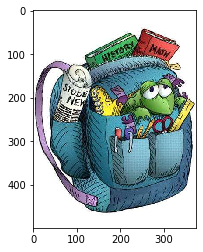

img.shape: (324, 222, 3)


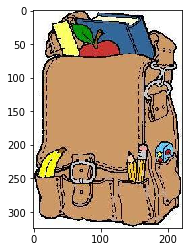

In [72]:
def read_and_show(image_path):
    '''
    function to read and show a given image file path.
    parameter:
    a. image_path: image file path
    '''
    # read as color image 
    img = cv2.imread(image_path, 1) #default opencv is in BGR, not RGB
    
    print("img.shape:", img.shape)

    # in this hands-on, we will use matplotlib to show the image
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # convert BGR to RGB 
                                               # (matplotlib use RGB format)
    plt.imshow(img)
    plt.show()

def show_image(img, gray=False):
    # img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # convert BGR to RGB 
                                               # (matplotlib use RGB format)
    print("image shape: ", img.shape)
    if(gray):
        plt.imshow(img, cmap='gray')
    else:
        plt.imshow(img)
       
    plt.show()
    
read_and_show(file_path[0])
read_and_show(file_path[1])

The two example images above have different sizes. Meanwhile in learning model, we need the inputs to have same sizes (dimensions), i.e., having same number of features. Two methods to tackle this issue are: (i) resizing the image into a fixed same size, and (ii) applying zero padding.<br>


## Note 1
1. For M01, M02, M03, M05 below, use the each function and **show** the first two images of each.
2. For M03, you don't need to do that, since it has 10k values for each image (too much to be printed).

## Milestone 01 (M01): image resizing
Please create a function that can resize all images in `file_path`.

prepocessed_images.shape: (150, 100, 100, 3)
image shape:  (100, 100, 3)


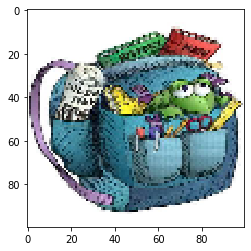

image shape:  (100, 100, 3)


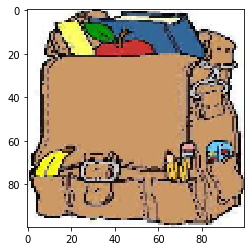

In [73]:
def resize_image(img_path, size=(100, 100)):
    '''
    parameter:
    a. img_path: file_path, which is 1D numpy array of all image file paths 
                 in the "Given Basic Code".
    b. size: tupple of desired image sizes, which is (height, width).
             In this hands-on week, use a default value of (100, 100).

    return:
    a. prepocessed_images = 4D numpy array with the size of 
                            (150,  desired_height, desired_width, 3).
    HINT: use "cv2.resize()" API to resize the image

    Tasks:
    a. prepocessed_images is in RGB format
    b. Please show first-two prepocessed_images with their sizes. 
       Make sure that both sizes are same.
    '''
    prepocessed_images = np.array([ cv2.cvtColor(cv2.resize(cv2.imread(image), size) ,cv2.COLOR_BGR2RGB) for image in img_path]) 
    print("prepocessed_images.shape:", prepocessed_images.shape)
    return prepocessed_images

prepocessed_images = resize_image(file_path)
show_image(prepocessed_images[0])
show_image(prepocessed_images[1])

## M02: zero-padding
Please create a function that can apply zero padding to all images in `file_path`.

prepocessed_images.shape: (150, 100, 100, 3)
image shape:  (100, 100, 3)


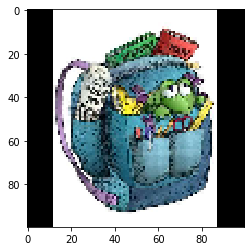

image shape:  (100, 100, 3)


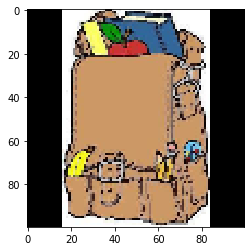

In [74]:
import math

def apply_zeropadding(img_path, size=(100, 100)):
    '''
    parameter:
    a. img_path: file_path, which is 1D numpy array of all image file paths 
                 in the "Given Basic Code".
    b. size: tupple of desired image sizes after zero padding, 
             which is (height, width). In this hands-on week, 
             use the default value of (100, 100).

    return:
    a. prepocessed_images = 4D numpy array with the size of 
                            (150,  desired_height, desired_width, 3).
    HINT: use "cv2.resize()" API so that the longer dimension becomes 100,
           then, pad the shorter dimension with zero intensity values.

    Tasks:
    a. prepocessed_images is in RGB format
    b. Please show first-two prepocessed_images with their sizes. 
       Make sure that both sizes are same.
    '''
    raw_imgs = [ cv2.cvtColor(cv2.imread(image) ,cv2.COLOR_BGR2RGB) for image in img_path] 
    prepocessed_images = []
    
    for img in raw_imgs:
        size_ratio = min((size[0]/img.shape[0]), (size[1]/img.shape[1]))
        size_new = (math.floor(img.shape[1]*size_ratio), math.floor(img.shape[0]*size_ratio))
        img_new = cv2.resize(img, size_new)
        
        pad_w, pad_h = (max(0, (size[1]-img_new.shape[1])),  max(0, (size[0]-img_new.shape[0])))
        pad_l_w = pad_w//2
        pad_r_w = pad_w - pad_l_w
        pad_l_h = pad_h//2
        pad_r_h = pad_h - pad_l_h
        
        img_padded = np.pad(img_new, [(pad_l_h,pad_r_h), (pad_l_w,pad_r_w), (0,0)], mode='constant')
        prepocessed_images.append(img_padded)
        
    # numpy arrays have no efficient append method. Better use python array first to fill the array and then convert it to np.array
    prepocessed_images = np.array(prepocessed_images)
        
    print("prepocessed_images.shape:", prepocessed_images.shape)
    return prepocessed_images

imgs_padded = apply_zeropadding(file_path)
show_image(imgs_padded[0])
show_image(imgs_padded[1])

## M03: grayscale image
Sometimes, using color images is too much so that our model becomes computationally expensive. Please make a function that can convert `prepocessed_images` from the result of `apply_zeropadding` function to grayscale images.

grayscale_images.shape: (100, 100)
image shape:  (100, 100)


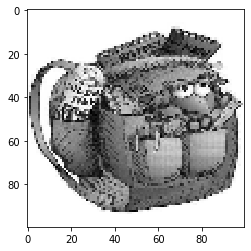

grayscale_images.shape: (100, 100)
image shape:  (100, 100)


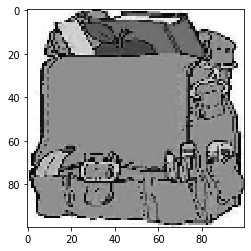

In [75]:
def convert_to_grayscale(input):
    '''
    parameter:
    a. input: "prepocessed_images" variable from the result of 
              "apply_zeropadding" function.

    return:
    a. grayscale_images = 4D numpy array with the size of 
                          (150,  100, 100, 1).
    HINT: use "cv2.cvtColor" API 
    
    Tasks:
    a. After finishing this function, use the function and show 
       first-two "grayscale_images".
    '''
    grayscale_images = cv2.cvtColor(input, cv2.COLOR_RGB2GRAY)
    print("grayscale_images.shape:", grayscale_images.shape)
    return grayscale_images

gray_1 = convert_to_grayscale(img_padded[0])
show_image(gray_1, gray=True)

gray_2 = convert_to_grayscale(img_padded[1])
show_image(gray_2, gray=True)

## M04: 1D features
Image is a spatial data, having heigh and width. A method like CNN (Convolutional Neural Network) is designed for this type of input data. However, for certain purpose, we may use other methods, such as SVM, random forest, etc, and those all prefer to use 1D feature. Thus, please make a function that can perform such need.

In [76]:
def convert_to_onedimfeature(input):
    '''
    parameter:
    a. input: "grayscale_images" variable from 
               the result of "convert_to_grayscale" function.

    return:
    a. onedim_features = 2D numpy array with the size of 
                         (150,  10000).
    HINT: very easy~ 
    '''
    onedim_features = input.flatten()
    print("onedim_features.shape:", onedim_features.shape)
    return onedim_features
    
one_dim_1 = convert_to_onedimfeature(gray_1)
one_dim_2 = convert_to_onedimfeature(gray_2)

onedim_features.shape: (10000,)
onedim_features.shape: (10000,)


# Image Augmentation
In image data, there are unlimited possibilities of the visual appearances, such as illumination (lighting), point of view, zooming factor, noise, etc, even from a single same object. To have a better model, we need a model that is more general to any possible visual appearance of the input image. To tackle this issue, we can apply data augmentation to the training set. See picture below.
<img src="cat_data_augmentation.png" alt="" width="500"/>

Eight pictures above are generated from one-same image. To generate those various image appeareances, we can apply, such as: (i) random flipping, (ii) random rotation, (iii) random translation, (iv) random zooming, (v) image shearing, (vi) add random noise, (vii) random cropping, etc. 

## M05: Image Augmentation
In this M05, you are asked to make a simple `data_augmentation` function with only two treatments: (i) radom rotation and (ii) random noise.<br>
**HINT**: For both (i) and (ii), you can use scikit-image libary API, which are `transform.rotate` from -25 to 25 degree and `util.random_noise`, respectively.

augmented_images.shape: (150, 100, 100, 3)
image shape:  (100, 100, 3)


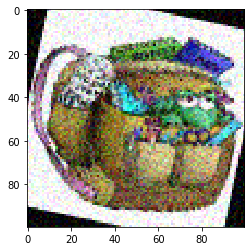

image shape:  (100, 100, 3)


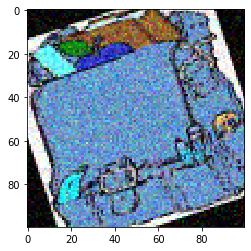

image shape:  (100, 100, 3)


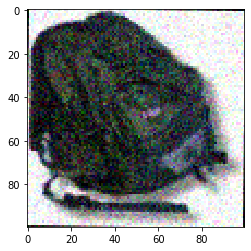

image shape:  (100, 100, 3)


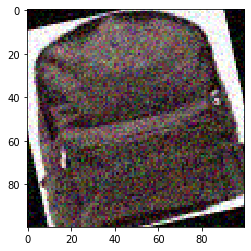

In [77]:
import random 
import skimage.transform # need to explicitly import the desired module because skimage uses lazy loading

def image_augmentation(input):
    '''
    parameter: 
    a. input: "prepocessed_images" variable from 
              the result of "apply_zeropadding" function.
    
    return: 
    a. augmented_images: 4D numpy array with the size of 
                         (150,  desired_height, desired_width, 3), 
                         where each image is already randomly applied
                         by the transformation: (i) random rotation 
                         & (ii) random noise.
                         
    task:
    a. After finishing this function, use the function and show first-four 
       "augmented_images".
    '''
    imgs_augmented = np.zeros(shape=(input.shape[0], input.shape[1], input.shape[2], 3), dtype=np.float32)
    for i in range(input.shape[0]):
        random_rotation_degree = random.uniform(-25,25)
        imgs_augmented[i] = sk.util.random_noise(sk.transform.rotate(input[i], random_rotation_degree))
        
    print("augmented_images.shape:", imgs_augmented.shape)
    return imgs_augmented

imgs_augmented = image_augmentation(img_padded)
show_image(imgs_augmented[0])
show_image(imgs_augmented[1])
show_image(imgs_augmented[2])
show_image(imgs_augmented[3])

## M06: extract a video
Video is actually a sequence of images (frames). In this M06, you are simply asked to make a function that can extract a video to images (frames).

extracted_images.shape: (50, 360, 640, 3)
image shape:  (360, 640, 3)


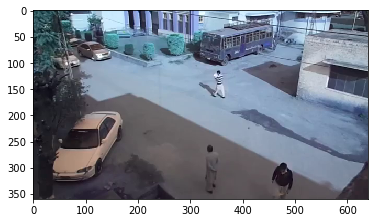

image shape:  (360, 640, 3)


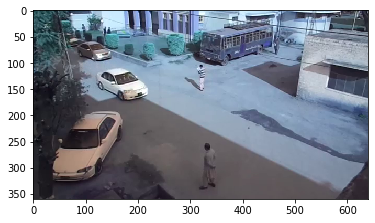

image shape:  (360, 640, 3)


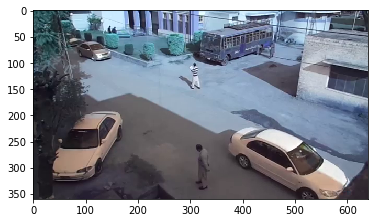

In [78]:
def extract_video(video_input):
    '''
    parameter:
    a. video_input: path of "video01.mp4" (provided in the zip file)
    
    return:
    a. extracted_images: 4D numpy array with the size of
                         (50, video_height=360, video_width=640, 3),
                         meaning that you are asked only to extract
                         first 50 frames of the video.
    Task:
    a. show the 1st, 25th and 50th image frames you extract from the given video.
                         
    HINT: use "cv2.VideoCapture" and ".read()" API for this M06.
    '''
    extracted_images = []
    vidcap = cv2.VideoCapture(video_input)
    
    i=0
    while (vidcap.isOpened() and i<50):
        success,image = vidcap.read()
        if success == False:
            break
        cv2.imwrite("/video-frames/frame%d.jpg" % i, image)     # save frame as JPEG file      
        success,image = vidcap.read()
        i += 1
        extracted_images.append(image)
        
    vidcap.release()
    cv2.destroyAllWindows()
    extracted_images = np.array(extracted_images)
    print("extracted_images.shape:", extracted_images.shape)
    return extracted_images

extracted_frames = extract_video('video01.mp4')
show_image(extracted_frames[0])
show_image(extracted_frames[24])
show_image(extracted_frames[49])

## Note 2:

After pre-processing all those images/videos, it's ready to feed them into your learning model, such as classifier, since they are already in numerical data/features and have same feature size/dimension. Enjoy~

# Week 05 Handson - Dimentionality Reduction
In this handson week, we will try to implement one of popular dimentionality reduction techniques, which is PCA (*Principal Component Analysis*). Along with the mathematical derivation explanation in the class, in this week handson, you are asked to implement that mathematical formula of PCA to a python function where the code template is provided below. Enjoy~

#### Read Digit MNIST to Array 2D
1. Code below is provided to read MNIST digit '0' and '1' where the final output is a matrix `original_data` (row is for the number of image being read, 200 images, and column is for image features, which is from image pixels = 784 pixels = 28 pixels $\times$ 28 pixels),
2. From 200 rows, the first 100 rows are digit of '0', and next 100 rows are digit of '1'.

In [3]:
import numpy as np 
import cv2 
import matplotlib.pyplot as plt
import os

# function to read MNIST digit to numpy array
def baca_image(folder_image):
    list_nama_image= os.listdir(folder_image)
    list_path_image = [os.path.join(folder_image, i) for i in list_nama_image]
    original_data = np.ndarray(shape=(0,28*28))
    for i in list_path_image:
        image = cv2.imread(i, 0)
        image_reshaped = image.reshape((1, -1))
        original_data = np.concatenate((original_data, image_reshaped), axis=0)
    return original_data
        
# use the fuction        
digit_0 = baca_image("digit_mnist/0")# adjust with your own path
digit_1 = baca_image("digit_mnist/1")# adjust with your own path

# concatenate digit of '0' and '1'
original_data = np.concatenate((digit_0, digit_1), axis=0)
print("original_data shape:", original_data.shape)

# label
label = np.full((200), 0); label[100:200] = 1
print("label shape:", label.shape)

original_data shape: (200, 784)
label shape: (200,)


## Milestone 01 (M01)
A template code is already provided below. In M01, you are asked to complete the `pca` function so that the `original_data` with 784 features will be reduced to **only 2 features with PCA**.

C:\Users\Dell Warna Biru\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\core\numeric.py:591: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


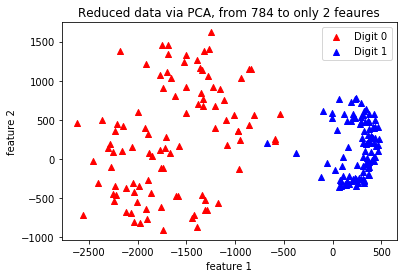

In [11]:
#create PCA function
def pca(input_ori, desired_dim):
    '''
    write code implementation of PCA here
    Hint: all the detailed steps are already explained in
          the lecture. You may take a look to "PCA_slide.pdf" (in the course portal)
    parameters:
    a. input_ori: "original_data" in the previous code block
    b. desired_dim: desired dimension = 2
    
    return values:
    a. W: projection matrix of PCA
    b. Y: projected/reduced data via PCA
    '''
    mean_ori = np.mean(input_ori, axis = 0) # or:  np.mean(input_ori.T, axis = 1) 
    mid_column = input_ori - mean_ori
    cov_mat = np.cov(mid_column.T) # covariance matrix: or -> np.matmul(mid_column.T, mid_column)
    
    eigen_val, eigen_vect= np.linalg.eig(cov_mat)
    
    W = eigen_vect.T[:desired_dim].T
    Y = np.matmul(input_ori, W)
    
#     W = np.full((1,1),1) # this is only a dummy data so that this
#                             # template code can be run without error
#     Y = np.full((200,2), 1) # another dummy data
    return W, Y 

# project the original data of MNIST digit with 784 pixels 
# (28 pixels x 28 pixels) to only two features / dimentions
projection_matrix, reduced_data = pca(input_ori=original_data,desired_dim=2)

#plotting
plt.scatter(reduced_data[0:100:,0], 
            reduced_data[0:100:,1],
            marker="^", c='red', label='Digit 0') #PCA plot for digit of '0'

plt.scatter(reduced_data[100:200:,0], 
            reduced_data[100:200:,1],
            marker="^", c='blue', label='Digit 1') #PCA plot for digit of '1'

plt.title("Reduced data via PCA, from 784 to only 2 feaures")
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.legend()
plt.show()

#### Illustration of a successfully reduced data via PCA
<img src="ilustrasi_hasil_PCA.JPG" alt="" width="500"/>

To further understand the use of PCA, we will use the reduced data via PCA to a classifier. In this case, we will compare the accuracy when using: (i) `original_data` vs (ii) `reduced_data`.

## M02
Before feeding to classifier, we will split our data to training and testing data.<br>
a. Please split `original_data` using `StratifiedShuffleSplit` API of scikit-learn with `n_splits=1` and ratio of `70%:30%` for `training:testing data`. From this, we will have: (i) `training_input`, (ii) `training_label`, (iii) `testing_input` and (iv) `testing_label`.

In [12]:
# Write code for M02 here
from sklearn.model_selection import StratifiedShuffleSplit

def splitData(data, label, train_sz, test_sz):
    sss = StratifiedShuffleSplit(n_splits=1, train_size=train_sz, test_size=test_sz, random_state=0)
    indices = sss.split(data, label)
    train_indices, test_indices = next(indices)
    print("indices form:")
    print(train_indices[0:2])
    
    train_splitted_data, train_splitted_label = data[train_indices], label[train_indices]
    test_splitted_data, test_splitted_label = data[test_indices], label[test_indices]
    print("data form:")
    print(train_splitted_data[0:2])

    print("label form:")
    print(train_splitted_label[0:2])
    
    return(train_splitted_data, train_splitted_label, test_splitted_data, test_splitted_label)

ori_train_splitted_X, ori_train_splitted_Y, ori_test_splitted_X, ori_test_splitted_Y = splitData(original_data, label, 0.7, 0.3)

indices form:
[28  0]
data form:
[[0. 0. 0. ... 0. 0. 0.]
 [3. 0. 0. ... 0. 0. 0.]]
label form:
[0 0]


## M03
a. Train a `DecisionTreeClassifier` (scikit-learn) using training data (`training_input` and `training_label`) of `original_data` you got in M02, then test the trained model using testing data (`testing_input` and `testing_label`) and calculate the accuracy.

In [13]:
# Write code for M03 here
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(ori_train_splitted_X, ori_train_splitted_Y)

predictions = clf.predict(ori_test_splitted_X)

from sklearn.metrics import accuracy_score
print("Accuracy: ", accuracy_score(y_pred=predictions, y_true=ori_test_splitted_Y))

Accuracy:  1.0


## M04

From M02(a), you have (i) `training_input`, (ii) `training_label`, (iii) `testing_input` and (iv) `testing_label`: <br><br>
a. Project `training_input` using `pca` function you aready complete before. Here, you will get `projection_matrix` and `reduced_training_input`.<br>
b. Project `testing_input` by this formula $\rightarrow$ `reduced_testing_input` = `testing_input` $\times$ `projection_matrix`.<br>
c. Train a `DecisionTreeClassifier` using `reduced_training_input` & `training_label`, test the trained model using `reduced_testing_input` & `testing_label`, and calculate the accuracy.<br><br>
**Hint:** You may get complex numbers (real-imaginer numbers) from PCA. In this case, you need to convert complex number to real number before feeding to the classifier in M04(c).

In [14]:
# Write code for M04 here
red_train_splitted_X, red_train_splitted_Y, _, _ = splitData(reduced_data, label, 0.7, 0.3)

print("ori_test_splitted_X shape:", ori_test_splitted_X.shape)
print("projection_matrix:", projection_matrix.shape)
prj_test_splitted_X = np.matmul(ori_test_splitted_X, projection_matrix)

# convert complex num to real:
red_train_splitted_X = red_train_splitted_X.astype(float)
prj_test_splitted_X = prj_test_splitted_X.astype(float)

# train a decision tree
from sklearn import tree
clf = tree.DecisionTreeClassifier()
print(red_train_splitted_X[0:2])
clf = clf.fit(red_train_splitted_X, red_train_splitted_Y)

predictions = clf.predict(prj_test_splitted_X)

from sklearn.metrics import accuracy_score
print("Accuracy: ", accuracy_score(y_pred=predictions, y_true=ori_test_splitted_Y))

indices form:
[28  0]
data form:
[[-2407.35544456+0.j  -301.56155093+0.j]
 [-2243.29236831+0.j  -542.75452095+0.j]]
label form:
[0 0]
ori_test_splitted_X shape: (60, 784)
projection_matrix: (784, 2)
[[-2407.35544456  -301.56155093]
 [-2243.29236831  -542.75452095]]
Accuracy:  1.0


C:\Users\Dell Warna Biru\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  if __name__ == '__main__':
C:\Users\Dell Warna Biru\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:10: ComplexWarning: Casting complex values to real discards the imaginary part
  # Remove the CWD from sys.path while we load stuff.


## M05
What are the accuracies you get from training using: "original data" (M03) and "reduced data via PCA" (M04.c)? Is it close or different enough? What can you infer from that?

## My Ans:

The accuracy after applying dimensionality reduction with PCA is still the same (1.0) in this case. In general, we can expect a slight loss in accuracy after PCA. However, even with reduced dimension, the model is still able to predict from the test data with a negligible reduction in accuracy. This is good because with reduced dimension, we are able to prevent the curse of dimensionality (feature space grows more sparse without enough training data to keep up, thus causing the model to overfit). With PCA, we could remove redundant and irrelevant features without incurring much loss of information. In addition, dimensionality reduction also leads to better human interpretations and less computational cost with simplification of models.

In general, applying PCA before building a model will NOT help to make the model perform better (in terms of accuracy).

This is because PCA is an algorithm that does not consider the response variable / prediction target into account. PCA will treat the feature as having large variance as important features, but the feature having large variance have noting to do with the prediction target.

This means, there is a possiblity that we end up producing a lot of useless features and eliminating useful features after PCA.



-- Definition --

## PCA
The main linear technique for dimensionality reduction, principal component analysis, performs a linear mapping of the data to a lower-dimensional space in such a way that the variance of the data in the low-dimensional representation is maximized. 

In practice, the covariance (and sometimes the correlation) matrix of the data is constructed and the eigenvectors on this matrix are computed. 

The eigenvectors that correspond to the largest eigenvalues (the principal components) can now be used to reconstruct a large fraction of the variance of the original data. 

Moreover, the first few eigenvectors can often be interpreted in terms of the large-scale physical behavior of the system, because they often contribute the vast majority of the system's energy, especially in low-dimensional systems. 

Still, this must be proven on a case-by-case basis as not all systems exhibit this behavior. The original space (with dimension of the number of points) has been reduced (with data loss, but hopefully retaining the most important variance) to the space spanned by a few eigenvectors.

Author:
    
Abel Stanley
13517068

# Week 06 Handson - Text Classifier
In this week hands-on, we will create a sentiment analyzer on twitter using the concept of classification and text pre-processing that we have learned before. We will cover:<br>
a. text pre-processing,<br>
b. splitting data for training & testing and converting them into numerical features,<br>
c. training a classifier model and perform predictions on testing dataset,<br>
d. Evaluating performance of algorithm<br>

## Read dataset "tweets.csv"

In [61]:
import numpy as np
import pandas as pd

tweets = pd.read_csv('./tweets.csv', sep=",")# adjust with your own path
tweets.head()

,ItemID,Sentiment,SentimentSource,SentimentText
0,1038,1,Sentiment140,that film is fantastic #brilliant
1,1804,1,Sentiment140,this music is really bad #myband
2,1693,0,Sentiment140,winter is terrible #thumbs-down
3,1477,0,Sentiment140,this game is awful #nightmare
4,45,1,Sentiment140,I love jam #loveit


## Milestone 01 (W01)
The given dataset is still a 'raw dataset' which includes some unwanted features, unwanted characters, etc.<br>
a. Select the `SentimentText` column as an attribute and the `Sentiment` column as a label (ground truth) for this study case<br><br>
b. In this M01.b, you have been provided a function template `pre_process` (see below) to perform all the pre-processing step to the all tweet data in the dataset. Complete pre-process function with all techniques that you have learned in the previous hands-on week (W03) for text pre-processing, so the all text attributes can be converted to `pre-processed text`, e.g., after being applied by: (i) tokenization, (ii) normalization, (iii) cleaning, (iv) stemming or lemmatization. Here, you will get `list of words`.<br><br>
c. Use the function that you have completed in M01.b, looped for each data row of `SentimentText` column. For each looping, you will get `list of words`. Append this `list of words` for each looping result in to list, so, will get `list of list`.<br><br>

d. Split (random & stratified) `list of list` you get in M01.c into `training data` and `testing data`. The testing dataset must be 20% from overall dataset. Print the total number of initial dataset, total number of training dataset and testing dataset. <br>


In [62]:
#put your code here for M01.a
X, y = tweets['SentimentText'], tweets['Sentiment']

print(X[0:2])
print(y[0:2])

0    that film is fantastic #brilliant
1     this music is really bad #myband
Name: SentimentText, dtype: object
0    1
1    1
Name: Sentiment, dtype: int64


In [63]:
#put your code here for M01.b
import nltk
from nltk.tokenize import word_tokenize
import string
from nltk.corpus import stopwords

def tokenize(text):
    return word_tokenize(text)

def normalization(text):
    def to_lower_case(text):
        return [w.lower() for w in text]
    
    table = str.maketrans('', '', string.punctuation)
    def remove_punctuation(text):
        return [w.translate(table) for w in text]
    
    def remove_non_alphabetic(text):
        return [word for word in text if word.isalpha() ]
    
    stop_words = set(stopwords.words('english' ))
    def remove_stopwords(text):
        return [w for w in text if not w in stop_words ]
    
    return remove_stopwords(remove_non_alphabetic(remove_punctuation(to_lower_case(text))))

from nltk.stem import WordNetLemmatizer
def lemmatize(text):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(w) for w in text]
    

def pre_process(input_ori):
    '''
    Write code implementation for text pre-processing here. 
    Use what you have learned before about text pre-processing.
    
    Parameter:
    input_ori = raw data text (single tweet data)
    
    Return value:
    processed_tweet = 'list of words'
    
    
    '''
    processed_tweet = lemmatize(normalization(tokenize(input_ori)))
    # processed_tweet = ['dummy','dummy','dummy'] #this is only dummy data
    
    return processed_tweet

pre_process('that film is fantastic #brilliant')

['film', 'fantastic', 'brilliant']

In [64]:
#put your code here for M01.c
X_ = []
for text in X:
    X_.append(pre_process(text))
    
X_[0:2]

[['film', 'fantastic', 'brilliant'], ['music', 'really', 'bad', 'myband']]

In [65]:
#put your code here for M01.d
from sklearn.model_selection import StratifiedShuffleSplit

def splitData(data, label, train_sz, test_sz, seed=0):
    sss = StratifiedShuffleSplit(n_splits=1, train_size=train_sz, test_size=test_sz, random_state=seed)
    indices = sss.split(data, label)
    train_indices, test_indices = next(indices)
    
    train_splitted_data, train_splitted_label = data[train_indices], label[train_indices]
    test_splitted_data, test_splitted_label = data[test_indices], label[test_indices]
                                                                        
    return (train_splitted_data, train_splitted_label, test_splitted_data, test_splitted_label)

X_ = np.array(X_)
training_data = {} 
testing_data = {}
training_data['X'], training_data['y'], testing_data['X'], testing_data['y'] = splitData(X_, y, 0.8, 0.2)

## M02
a. Build `tfidf_model` by using codes below with `training data` you get in M01.d. (`TfidfVectorizer` is from scikit-learn)
```
def dummy(doc):
    return doc
tfidf = TfidfVectorizer(
    analyzer='word',
    tokenizer=dummy,
    preprocessor=dummy,
    token_pattern=None)
```
b. Transform `training data` and `testing data` you get in M01.d by using `tfidf_model` you get in M02.a. In this case, you will get numerical features, both from `training data` and `testing data`.<br><br>
c. Choose a classification algorithm (you may use library such as scikit-learn), and explain why you choose it.<br><br>
d. Train the classifier model, based on the algorithm you have chosen, by using numerical features of `training data` from M02.b.<br><br>
e. Make predictions on the numerical features of `testing dataset` you get in M02.b using the classifier model that you have trained.

In [66]:
from sklearn.feature_extraction.text import TfidfVectorizer
# put your code here for M02.a
def dummy(doc):
    return doc

tfidf = TfidfVectorizer(
    analyzer='word', #''
    tokenizer=dummy ,
    preprocessor=dummy,
    token_pattern=None )
       
# train / learn from the given data
model = tfidf.fit(training_data['X'])

In [67]:
# put your code here for M02.b
training_data['X'] = model.transform(training_data['X'] ).toarray()
testing_data['X'] = model.transform(testing_data['X'] ).toarray()

Your explanation (M02.c):

Logistic regression is the appropriate regression analysis to conduct when the dependent variable is **dichotomous (binary)**.  Like all regression analyses, the logistic regression is a predictive analysis.  Logistic regression is used to describe data and to explain the relationship between one dependent binary variable and one or more nominal, ordinal, interval or ratio-level independent variables.

Based on my research, we use logistic regression when:
1. We have a binary or dichotomous Y variable.
2. We have explanatory X-variables that we think are related to the Y-variable.
3. It is reasonable to think that the value the Y-variable takes on is like a coin flip where the probability of getting a 1 (“heads”) depends on the explanatory variables.

The prediction class in this particular dataset consists only of 2 types of classes, which means that the dependent variable is binary. The SentimentText column in the dataset serves as the X-variable which also correlates and explain the Y variable (Sentiment class). Thus, the dataset fits the preferred use-case of Logistic Regression.

In [68]:
y.value_counts()

0    974
1    958
Name: Sentiment, dtype: int64

In [69]:
# put your code here for M02.d
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# use Grid search to find the best parameters for Logistic Regression:
param_grid_lr = {
'solver': ['newton-cg', 'lbfgs', 'liblinear','sag','saga'],
'class_weight':[None, 'balanced'],
'C':np.logspace(-4, 4, 20),
'max_iter':[100, 250, 500]
}

gs_cv = GridSearchCV(LogisticRegression(random_state=0), param_grid_lr).fit(training_data['X'] , training_data['y'])
print("Best Score: ", gs_cv.best_score_)
print("Best Params: ", gs_cv.best_params_)

C:\Users\Dell Warna Biru\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Dell Warna Biru\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Dell Warna Biru\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Dell Warna Biru\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceW

C:\Users\Dell Warna Biru\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Dell Warna Biru\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Dell Warna Biru\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Dell Warna Biru\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceW

C:\Users\Dell Warna Biru\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Dell Warna Biru\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Dell Warna Biru\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Dell Warna Biru\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceW

C:\Users\Dell Warna Biru\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Dell Warna Biru\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver optio

C:\Users\Dell Warna Biru\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Dell Warna Biru\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Dell Warna Biru\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the c

C:\Users\Dell Warna Biru\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Dell Warna Biru\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Dell Warna Biru\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the c

C:\Users\Dell Warna Biru\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Dell Warna Biru\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Dell Warna Biru\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the c

C:\Users\Dell Warna Biru\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Dell Warna Biru\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Dell Warna Biru\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Dell Warna Biru\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceW

C:\Users\Dell Warna Biru\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Dell Warna Biru\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Dell Warna Biru\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Dell Warna Biru\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceW

C:\Users\Dell Warna Biru\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Dell Warna Biru\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Dell Warna Biru\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Dell Warna Biru\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceW

C:\Users\Dell Warna Biru\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Dell Warna Biru\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Dell Warna Biru\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Dell Warna Biru\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number 

C:\Users\Dell Warna Biru\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Dell Warna Biru\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Dell Warna Biru\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Dell Warna Biru\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceW

Best Score:  0.9883495145631068
Best Params:  {'C': 0.00026366508987303583, 'class_weight': 'balanced', 'max_iter': 100, 'solver': 'sag'}


C:\Users\Dell Warna Biru\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [70]:
# Train Logistic Regression with best parameters:
clf = LogisticRegression(random_state=0, C=0.00026366508987303583, class_weight='balanced', max_iter=100, solver='sag').fit(training_data['X'] , training_data['y'])

In [71]:
# put your code here for M02.e
from sklearn.metrics import classification_report

predictions = clf.predict(testing_data['X'])

## M03
After train the classification model and make prediction using that model, now you will evaluate the performance of your model against testing dataset.<br>
a. Calculate and print the accuracy of your model's predictions in M02.e against testing dataset ground truth<br>
b. What you can infer based on the result?<br>

In [72]:
#put your code here for Q03.a
print(classification_report(y_true = testing_data['y'], y_pred = predictions))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       195
           1       0.96      0.98      0.97       192

    accuracy                           0.97       387
   macro avg       0.97      0.97      0.97       387
weighted avg       0.97      0.97      0.97       387



Your answer (M03.b) :

Using logistic regression classifier, we get an Accuracy of 0.97 and f-1 score of 0.97, which is pretty good.

*definitions:*

1. Precision — TP/(TP+FP), meaning the proportion of points that model classify as positives are actually positives.
2. Recall — TP/(TP+FN), meaning the proportion of actual positives that are correctly classified by the model.
3. F1 score —the harmonic mean of precision and recall.
4. The support is the number of occurence of the given class in your dataset (so we have 195 of class 0 and 192 of class 1, which is a really well balanced dataset.

Sometimes accuracy might not be the most appropriate evaluation metric when class distribution is imbalanced. However in this case, class 0 and 1 is evenly distributed (974 vs 958), so Accuracy is a valid metric to measure model's performance.

Therefore, a Logistic Regression model is a suitable classifier model for this specific sentiment analysis case.

# Week 07 Handson - Association Rule
In this hands-on session, we will try to uncover the association rule from given transaction items. Association rule mining is a technique to identify underlying relations between different items. We will cover:
1. data preprocessing for association rule,
2. implement algorithm for association rule,
3. find interesting association rule from dataset

## Read dataset "dataset_association_rule.dat"

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('dataset_association_rule.dat', header=None)
df.head()

,0
0,36 69 115 226 278 343 345 358 368 370 401 450 ...
1,8 51 55 73 78 117 140 175 187 229 266 295 304 ...
2,53 55 98 159 192 322 332 402 412 413 424 430 4...
3,48 203 205 227 279 294 320 335 359 414 509 525...
4,58 69 73 82 120 146 166 178 217 220 244 256 33...


## Milestone 01 (M01)
Based on the dataset given to you, perform data pre-processing so that the data become ready to be fed to the algorithm (you may use any library providing you an assocation rule API). Save the result of pre-processed data in a variable called 'item_belanja'.<br>

In [42]:
#put your code here for M01

# convert transaction data into array of tsx elements
item_belanja = []
for i in range(0, df.shape[0]):
    item_belanja.append(df.values[i][0].split())  

In [43]:
# preprocess for mlxtend: convert into one-hot encoded pandas DataFrame
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(item_belanja).transform(item_belanja)
df = pd.DataFrame(te_ary, columns=te.columns_)

Print the pre-processing result (you may print only some parts of the data) :

In [44]:
item_belanja[0]

['36',
 '69',
 '115',
 '226',
 '278',
 '343',
 '345',
 '358',
 '368',
 '370',
 '401',
 '450',
 '489',
 '494',
 '573',
 '577',
 '581',
 '583',
 '610',
 '682',
 '692',
 '705',
 '722',
 '832',
 '862',
 '886',
 '908',
 '923',
 '932',
 '960',
 '977']

In [45]:
df.head()

,0,1,10,100,101,102,103,104,105,106,...,989,990,991,992,993,994,995,997,998,999
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### Data statistics analysis to determine min-support value

In [46]:
# count total transactions in the dataset:
total_tsxs = len(item_belanja)
display(total_tsxs)

# count total elements
# total_elements = len(item_belanja) * len(item_belanja[0])
# display(total_elements)

100000

In [47]:
# Count number of occurences of every value in the dataset
from collections import Counter


uniques = set(x for l in item_belanja for x in l)
# display(uniques)

from collections import defaultdict
value_counts = defaultdict(int)
for unique in uniques:
    for tsx in item_belanja:
        if(unique in tsx):
            value_counts[unique] +=1
            
display(value_counts)
# value_counts = Counter(x for xs in item_belanja for x in set(xs))
# display(value_counts)
# EQUALS TO:

# >>> c = Counter()
# >>> for xs in seq:
# ...     for x in set(xs):
# ...         c[x] += 1
# ...
# >>> c

defaultdict(int,
            {'449': 5178,
             '8': 14249,
             '152': 1136,
             '283': 14727,
             '304': 4272,
             '784': 7579,
             '790': 4482,
             '5': 3396,
             '757': 1914,
             '67': 781,
             '78': 7491,
             '46': 9035,
             '782': 7113,
             '204': 12364,
             '124': 1404,
             '209': 2285,
             '740': 3322,
             '755': 298,
             '732': 4058,
             '818': 1329,
             '493': 853,
             '98': 3021,
             '530': 3288,
             '843': 4538,
             '648': 1938,
             '360': 1519,
             '781': 220,
             '794': 3512,
             '451': 314,
             '473': 755,
             '569': 5126,
             '566': 139,
             '500': 906,
             '898': 1836,
             '841': 6753,
             '603': 630,
             '991': 5879,
             '993': 46,
           

In [48]:
# count support val for every value:
for key,val in value_counts.items():
    value_counts[key] = val / total_tsxs
    
display(value_counts)

defaultdict(int,
            {'449': 0.05178,
             '8': 0.14249,
             '152': 0.01136,
             '283': 0.14727,
             '304': 0.04272,
             '784': 0.07579,
             '790': 0.04482,
             '5': 0.03396,
             '757': 0.01914,
             '67': 0.00781,
             '78': 0.07491,
             '46': 0.09035,
             '782': 0.07113,
             '204': 0.12364,
             '124': 0.01404,
             '209': 0.02285,
             '740': 0.03322,
             '755': 0.00298,
             '732': 0.04058,
             '818': 0.01329,
             '493': 0.00853,
             '98': 0.03021,
             '530': 0.03288,
             '843': 0.04538,
             '648': 0.01938,
             '360': 0.01519,
             '781': 0.0022,
             '794': 0.03512,
             '451': 0.00314,
             '473': 0.00755,
             '569': 0.05126,
             '566': 0.00139,
             '500': 0.00906,
             '898': 0.01836,
      

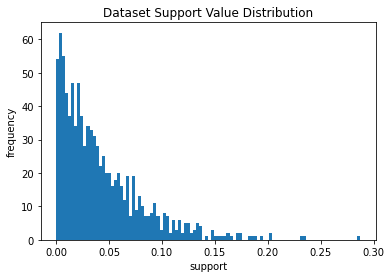

In [49]:
values = value_counts.values()

# plot value data distribution at each element
# plt.barh(values, np.arange(len(values)))
# plt.show()

# plot frequency of each values
plt.hist(values, bins=100)
plt.title('Dataset Support Value Distribution')
plt.xlabel("support")
plt.ylabel("frequency")
plt.show()

In [57]:
# ASSUME: appropriate min-support is the 0.5 percentile
min_support = np.percentile(list(values),50)
display("Min_support is:", min_support)

'Min_support is:'

0.031075

## M02
In this step, you will generate association rules from your ready-to-go-dataset.<br><br>
a. Again, choose the library you will use for generating association rules, mention what the algorithm is, and explain the reason/s why you choose it<br>
b. Using the library that you've chosen in (M02.a), generate association rules from the pre-processed dataset in M01.<br>
c. Print the association rule that you've found in M02.b along with their support and confidence scores.<br>
d. What is/are your conclusion/s from the association rules you obtain?

Your answer (M02.a):

### A. Algorithms for Frequent Pattern Mining
There are several prevalent algorithms for frequent itemset mining:
#### 1. Apriori
The first algorithm for fp mining. Designed for horizontal layout db based on breadth first search and join + prune method.
#### 2. Eclat
A vertical db layout algorithm based on depth first search.
#### 3. FP Growth
A tree based algorithm with divide and conquer method to mind fp in database. It constructs the conditional frequent pattern tree which satisfy the minimum support.

#### Comparison Conclusion:
Apriori has a major weakness of producing large number of candidate itemsets and database scans which equals to maximum length of frequent itemset. (Goswami  D.N et. al., 2010)

This poses a scalability problem when the database is large. This is because Apriori lacks efficient processing method on database. (SathishKumar et al., 2010)  

FP Growth is the most scalable out of all three. FP Growth also gives better performance compared to Eclat, although Eclat has a special knack of its ability to process vertical datasets.

#### Algorithm to choose:
Based by performance analysis above, it would be wise to pick FP Growth. However, I also wanted to see just how much better FP Growth is compared to Apriori. Thus, I will be conducting experiment on both Apriori and FP Growth algorithm.


### B. Choosing Libraries

From the experiment below, I've fiddled with two libraries that provide basic Apriori implementation:

#### 1. apyori
API:
apriori(transactions,
        min_support:float,
        min_confidence:float,
        min_lift:float,
        max_length:int)
Return datatype: RelationRecord

#### 2. mlxtend
API:
apriori(
    df: pandas DataFrame,
    min_support: float,
    use_colnames: bool,
    max_len: int,
    verbose: int,
    low_memory: bool
)

Return datatype: pandas DataFrame

#### Comparison
- From the API provided, apyori offers a more selective and specific pre-run constraints as parameters where as mlxtend only provides min_support constraint. This makes apyori the better library if we want to propose a strict selective constraints pre-run for our results. This turns into a huge deal when the dataset is large and the computing power is limited (which happens in this experiment). However, mlxtend provides special "low_memory" feature that helps in cases where the dataset is large and memory resources are limited.

- Judging by the returned results from both API, mlxtend has an edge over apyori with pandas DataFrame because of its extensive and convenient filtering features compared to RelationRecord. Furthermore, pandas DataFrame format is easier to discern and to understand by humans (this is subjective though). However, because apyori API already provides a more specific constraint with its parameters, we may not need the benefits of pandas DataFrames as much.

- mlxtend proposes a specific pandas DataFrame format for its input. The official guide recommends using mlxtend.preprocessing module's TransactionEncoder to convert raw input into one-hot encoded pandas DataFrame. This pre-processing overhead could be considered as negative in some cases.

- mlxtend has a complete, very helpful, official guide available online. Apyori, although widely used, does not have the same extensiveness in its documentation (the only which I could find is not official).

- According to my own experiment, apyori produces result faster compared to mlxtend (not benchmarked rigorously, please take with a grain of salt)

#### Conclusion
- For Apriori: I decided to use apyori for its light pre-processing needs, faster operation, and its readily available filtering parameters. mlxtend biggest downfall is its lack of pre-run min-confidence, min-length, and min-lift constraint, causing the algorithm to run in an inexorably long time or causing memory issues.

- For FP-Growth: I decided to go with mlxtend this time because pre-run constraint parameters are not that big of a deal with FP-Growth algorithm, which is magnitudes faster than Apriori. Also, based on my research, there are not that many FP-Growth libraries out there, most that I find is either old and unmantained (strictly based on python2 and do not support python3) or with questionably lesser quality in documentation compared to mlxtend.

#### Apriori with apyori

In [58]:
#put your code here for M02.b
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from apyori import apriori

association_rules = apriori(item_belanja, min_support=min_support, min_confidence=0.3, min_lift=2, min_length=2)
apyori_association_rules = list(association_rules)

#### Apriori with mlxtend

In [59]:
from mlxtend.frequent_patterns import apriori
frequent_itemsets = apriori(df, min_support=0.1, use_colnames=True)

In [56]:
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.12494,(110),1
1,0.10284,(112),1
2,0.10377,(115),1
3,0.13204,(12),1
4,0.13343,(120),1
...,...,...,...
137,0.08343,(967),1
138,0.11264,(982),1
139,0.07998,(984),1
140,0.08579,(989),1


In [57]:
frequent_itemsets[ (frequent_itemsets['length'] > 1)]

,support,itemsets,length


Apriori with mlxtend does not provide parameters to constraint min-confidence, lift, and length. Thus, my machine is only able to run the algorithm in reasonable time when min-support parameter is 0.1, which does not produce any good ruleset at all.

#### FP-Growth with mlxtend

Generate Frequent itemsets

In [60]:
from mlxtend.frequent_patterns import fpgrowth

fp_growth_result = fpgrowth(df, min_support=min_support, use_colnames=True)

It is possible to run FP-Growth algorithm with a very low min-support in reasonable time because FP-growth doesn't require creating candidate sets explicitly.

Generate Association Rule

In [61]:
from mlxtend.frequent_patterns import association_rules

fp_growth_association_rules = association_rules(fp_growth_result, metric="confidence", min_threshold=0.3)
display(fp_growth_association_rules)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(489),(368),0.18921,0.28738,0.06120,0.323450,1.125514,0.006825,1.053315
1,(682),(368),0.17427,0.28738,0.06130,0.351753,1.224000,0.011218,1.099303
2,(692),(368),0.17203,0.28738,0.05867,0.341045,1.186739,0.009232,1.081440
3,(692),(529),0.17203,0.23384,0.05409,0.314422,1.344603,0.013863,1.117539
4,(450),(368),0.13324,0.28738,0.04655,0.349370,1.215706,0.008259,1.095276
...,...,...,...,...,...,...,...,...,...
62,(25),(510),0.08856,0.20125,0.03119,0.352191,1.750015,0.013367,1.233002
63,(25),(368),0.08856,0.28738,0.03113,0.351513,1.223165,0.005680,1.098897
64,(427),(529),0.10480,0.23384,0.03637,0.347042,1.484100,0.011864,1.173368
65,(661),(368),0.09059,0.28738,0.03118,0.344188,1.197676,0.005146,1.086623


Filter the Association Rule

In [62]:
fp_growth_association_rules = fp_growth_association_rules[( fp_growth_association_rules['lift'] >= 2 )]

#### Print Result

Result from apriori with apyori

In [63]:
#put your code here for M02.c
print("Association rules number: ", len(apyori_association_rules))
display(apyori_association_rules)

Association rules number:  2


[RelationRecord(items=frozenset({'205', '509'}), support=0.03544, ordered_statistics=[OrderedStatistic(items_base=frozenset({'509'}), items_add=frozenset({'205'}), confidence=0.3913427561837456, lift=2.3521021528052986)]),
 RelationRecord(items=frozenset({'510', '581'}), support=0.03352, ordered_statistics=[OrderedStatistic(items_base=frozenset({'581'}), items_add=frozenset({'510'}), confidence=0.4295783672946303, lift=2.1345508933894672)])]

Result from fp_growth with mlxtend

In [64]:
display(fp_growth_association_rules)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
11,(581),(510),0.07803,0.20125,0.03352,0.429578,2.134551,0.017816,1.400280
25,(509),(205),0.09056,0.16638,0.03544,0.391343,2.352102,0.020373,1.369605


Your conclusion (M02.d):

### My conclusion:
Brief explanation on constraints that I propose for the association rules:
- I proposed a minimum confidence threshold of 0.3, this means that I only want association rules with a minimum 0.3 probability guarantee that if I see the antecendent, I will also see the consequent product being bought too. I picked 0.3 because 30% probability is, in my humble opinon, a nice estimate to judge if two products could be associated together as a combo.
- I proposed a minimum lift of 2, because a lift lesser than 2 or nearing 1 means that there are no association between the antecendent and consequent. I don't want independent cases showing up in the rules.
- I proposed a minimum support threshold by the 50% percentile of support distribution. It is a fairly high threshold, but I thought normally, we would only be interested in products with significant support values (popular products).

- There are lots of items that has an association with each other in this dataset.

Reading the data:
- Apriori with apyori produces the same result with fp_growth with mlxtend
- {205, 509} and {581,510} itemsets are a very popular combination, boasting support value higher than 50% percentile (0.031075) of the whole support value distribution.
- There is an approx, 43% chance that item 510 is also bought when item 581 is bought.
- There is an approx, 39% chance that item 205 is also bought when item 509 is bought.
- People buy item 581 and 510 together 2.13 times more likely than just buying item 510.
- People buy item 509 and 205 together 2.35 times more likely than just buying item 205.
- Both leverage values are not 0, so they are not independent but dependent with each other.
- Both convition are not 1, so they are not independent with each other. Higher conviction means consequent items are more dependent to the antecendent items. Item 510 depends more on 581 for its sale compared to how much item 205 depends on 509, although the difference is not that significant.

Therefore, the logical step to take as a shop business owner would be:
- Group item 510 with 581 together and item 509 and 205 together in a bundle purchase/package.
- Create a promotion campaign that offers discount or other benefits for buying item 510 alongside item 581 

# Week 10 Handson

In this week, we will teach you how to implement regression model from-the-scratch. In this week, a mathematical derivation of regression will be carried in the class before hands-on. Then, you are expected to implement the final derivation formula into a python code.

#### Used Data 

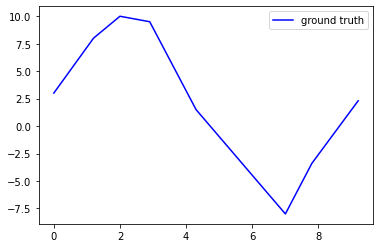

In [133]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

X =np.array([0,1.2,2,2.9,4.3,7,7.8,9.2]) # input of regression model
y = np.array([3,8,10,9.5,1.5,-8,-3.4,2.3]) # target (ground truth) 
                                           # of regression model

plt.figure("original data")
plt.plot(X,y,c='blue',label='ground truth')
plt.legend()
plt.show()

**Notes:** before you start to work on M01-M04, we want to inform that you may make usable fuctions, since they (M01-M04) are basically quite similar.

In [134]:
# x = np.array([
#     [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
#     [80,93,100,82,90,99,81,96,94,93,97,95,100,85,85,87],
#     [8,9,10,12,11,8,8,10,12,11,13,11,8,12,9,12]
# ]).T
# y = np.array([2256,2340,2426,2293,2330,2368,2368,2250,2409,2364,2440,2364,2404,2317,2309,2328]).reshape(-1,1)
display(X.shape)
display(y.shape)

(8,)

(8,)

## Milestone (M01)
a. Make a linear regression model, i.e., find linear regression coefficient $\mathbf{a}$ ($\mathbf{a}$ is notation used in the `Week11 - Pengantar Regresi.pdf`).<br>
b. Calculate regression prediction using regression coefficient $\mathbf{a}$ you get in M01.a.<br>
c. Plot prediction output you get in M01.b together (in the same plot) with the ground truth. (Please put label/legend to differ plots of prediction and ground truth)

In [135]:
# write code for M01.a here
def preprocess(x,y):
    x_ = x.reshape(-1,1).tolist() # so we can append
    # add bias:
    for i in range(len(x_)):
        x_[i].insert(0,1)
    return np.array(x_), y.reshape(-1,1)
    
def find_regression_coeff(X,y):
    # calculate the a
    XTX = np.matmul(X.T, X)
    # print(XTX)
    XTy = np.matmul(X.T, y)
    # print(XTy)
    a = np.matmul(np.linalg.inv(XTX),XTy)
    # print(a)
    return a
#     return np.matmul(np.matmul(np.linalg.inv(np.matmul(X.T, X)),X.T), y)

X_,y_ = preprocess(X,y)
a = find_regression_coeff(X_,y_)
print(a)
# final shapes:
display(a.shape)
display(X_.shape)

[[ 8.10697402]
 [-1.21964512]]


(2, 1)

(8, 2)

In [136]:
# write code for M01.b here
def regression_predict(X,a):
    return np.matmul(X,a)

X_pred = regression_predict(X_,a)
print(X_pred)

[[ 8.10697402]
 [ 6.64339987]
 [ 5.66768378]
 [ 4.57000317]
 [ 2.8625    ]
 [-0.43054183]
 [-1.40625792]
 [-3.11376109]]


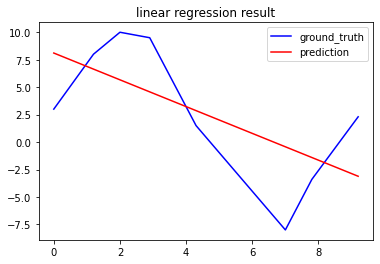

In [137]:
# write code for M01.c here
def plot_regression_result(title, prediction, ground_truth):
    plt.figure("regression_result")
    plt.plot(X,ground_truth,c='blue',label='ground truth')
    plt.plot(X,prediction,c='red',label='prediction')
    plt.title(title)
    plt.legend(['ground_truth','prediction'], loc='upper right')
    plt.show()
    
plot_regression_result('linear regression result', X_pred, y)

Compare with sklearn's result:

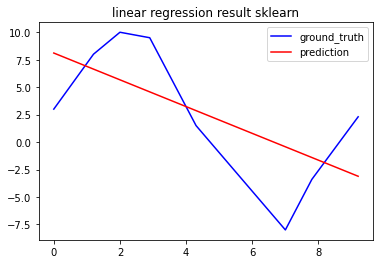

In [138]:
from sklearn.linear_model import LinearRegression
X_,y_ = preprocess(X,y)
lin_reg = LinearRegression()
lin_reg.fit(X_, y_)
X_pred_ = lin_reg.predict(X_)
plot_regression_result('linear regression result sklearn', X_pred_, y)

## M02 (same with M01, but 2nd order polynomial)
a. Make a polynomial regression model with $order=2$, i.e., find linear regression coefficient $\mathbf{a}$ ($\mathbf{a}$ is notation used in the `Week11 - Pengantar Regresi.pdf`).<br>
b. Calculate regression prediction using regression coefficient $\mathbf{a}$ you get in M02.a.<br>
c. Plot prediction output you get in M02.b together (in the same plot) with the ground truth. (Please put label/legend to differ plots of prediction and ground truth)

In [139]:
# write code for M02.a here
def polynomial_preprocess(X, degree):
    X_ = X.tolist() # so we can append
    for i in range(len(X_)):
        for j in range(2,degree+1):
            X_[i].append(X_[i][1] ** j)
    return np.array(X_)

X_,y_ = preprocess(X,y)
X_ = polynomial_preprocess(X_,2)
print(X_)
            
# calculate a
a = find_regression_coeff(X_, y_)
display(a)

[[ 1.    0.    0.  ]
 [ 1.    1.2   1.44]
 [ 1.    2.    4.  ]
 [ 1.    2.9   8.41]
 [ 1.    4.3  18.49]
 [ 1.    7.   49.  ]
 [ 1.    7.8  60.84]
 [ 1.    9.2  84.64]]


array([[ 8.14981621e+00],
       [-1.25379507e+00],
       [ 3.66819831e-03]])

In [140]:
# write code for M02.b here
def polynomial_regression_predict(X,a):
    return np.matmul(X,a)

X_pred = polynomial_regression_predict(X_,a)
print(X_pred)

[[ 8.14981621]
 [ 6.65054433]
 [ 5.65689886]
 [ 4.54466005]
 [ 2.82632239]
 [-0.44700757]
 [-1.40661215]
 [-3.07462213]]


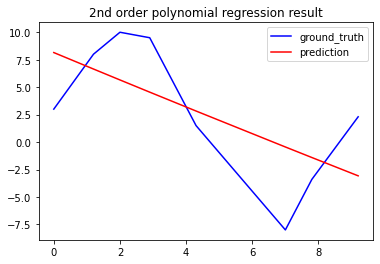

In [141]:
# write code for M02.c here
plot_regression_result('2nd order polynomial regression result', X_pred, y)

Compare with sklearn's result

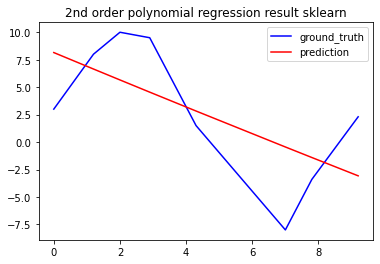

In [142]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
X_,y_ = preprocess(X,y)
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X_)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y_)
X_pred_ = pol_reg.predict(X_poly)

plot_regression_result('2nd order polynomial regression result sklearn', X_pred_, y)

## M03 (same with Q02, but 4th order polynomial)
a. Make a polynomial regression model with $order=4$, i.e., find linear regression coefficient $\mathbf{a}$ ($\mathbf{a}$ is notation used in the `Week11 - Pengantar Regresi.pdf`).<br>
b. Calculate regression prediction using regression coefficient $\mathbf{a}$ you get in M03.a.<br>
c. Plot prediction output you get in M03.b together (in the same plot) with the ground truth. (Please put label/legend to differ plots of prediction and ground truth)

In [143]:
# write code for Q03.a here
X_,y_ = preprocess(X,y)
X_ = polynomial_preprocess(X_,4)
print(X_)
            
# calculate a
a = find_regression_coeff(X_, y_)
display(a)

[[1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [1.0000000e+00 1.2000000e+00 1.4400000e+00 1.7280000e+00 2.0736000e+00]
 [1.0000000e+00 2.0000000e+00 4.0000000e+00 8.0000000e+00 1.6000000e+01]
 [1.0000000e+00 2.9000000e+00 8.4100000e+00 2.4389000e+01 7.0728100e+01]
 [1.0000000e+00 4.3000000e+00 1.8490000e+01 7.9507000e+01 3.4188010e+02]
 [1.0000000e+00 7.0000000e+00 4.9000000e+01 3.4300000e+02 2.4010000e+03]
 [1.0000000e+00 7.8000000e+00 6.0840000e+01 4.7455200e+02 3.7015056e+03]
 [1.0000000e+00 9.2000000e+00 8.4640000e+01 7.7868800e+02 7.1639296e+03]]


array([[ 2.54367257e+00],
       [ 9.43468387e+00],
       [-3.49267218e+00],
       [ 3.19584309e-01],
       [-5.56615726e-03]])

In [144]:
# write code for Q03.b here
X_pred = polynomial_regression_predict(X_,a)
print(X_pred)

[[ 2.54367257]
 [ 9.37654498]
 [ 9.90996756]
 [ 7.93154077]
 [ 2.03953591]
 [-6.30140265]
 [-5.30375782]
 [ 2.70389867]]


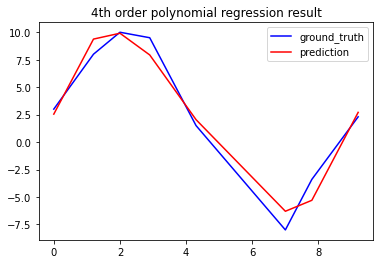

In [145]:
# write code for Q03.c here
plot_regression_result('4th order polynomial regression result', X_pred, y)

Compare with sklearn's result

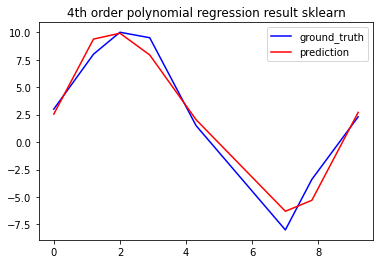

In [151]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
X_,y_ = preprocess(X,y)
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X_)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y_)
X_pred_ = pol_reg.predict(X_poly)

plot_regression_result('4th order polynomial regression result sklearn', X_pred_, y)

## M04 (same with M03, but with regularization)
a. Make a **regularized** polynomial regression model with $order=4$ and regularization constant $\lambda=0.5$ (find the regression coefficient $\mathbf{a}$).<br>
b. Calculate regression prediction using regression coefficient $\mathbf{a}$ you get in M04.a.<br>
c. Plot prediction output you get in M04.b together (in the same plot) with the ground truth. (Please put label/legend to differ plots of prediction and grount truth)

In [152]:
# write code for Q04.a here
def find_regression_coeff_with_regularization(X,y, lambda_, order):
    # calculate the a
    XTX = np.matmul(X.T, X)
    XTXlambdaI = np.add(XTX,  (lambda_ * np.identity(order+1)))
    # print(XTX)
    XTXlambdaIXT = np.matmul(np.linalg.inv(XTXlambdaI),X.T)
    # print(XTy)
    a = np.matmul(XTXlambdaIXT,y)
    # print(a)
    return a

X_,y_ = preprocess(X,y)
X_ = polynomial_preprocess(X_,4)
a= find_regression_coeff_with_regularization(X_, y_, 0.5, 4)
display(a)

array([[ 3.45119858],
       [ 4.36414443],
       [-0.77210706],
       [-0.13017814],
       [ 0.01760622]])

In [153]:
# write code for Q04.b here
X_pred_ = polynomial_regression_predict(X_,a)
display(X_pred)

array([[ 3.45119858],
       [ 7.38789818],
       [ 8.33133367],
       [ 7.6841371 ],
       [ 3.60990382],
       [-6.21159923],
       [-6.09023584],
       [ 3.01176443]])

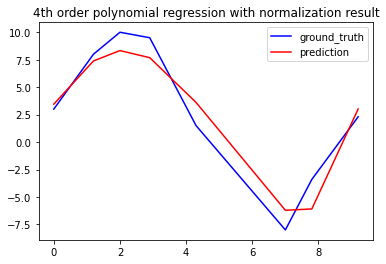

In [150]:
# write code for Q04.c here
plot_regression_result('4th order polynomial regression with normalization result', X_pred, y)

# Week 12 Handson - Assignment/Project 2: Regression #02

As the previous assignment, the objective of this project is to explore your capability as data analyst. You are challenged to implement data mining methods, given a raw dataset. Then, you need to propose several regression methods for the data, analyze and evaluate it. 

Basic tasks you need to perform in this project: (Note: you can add additional tasks that you think necessary for this project)

1.	Build regression models to predict the price for second hand cars. This step should include EDA, pre-processing, creating model and evaluation. You may use several regression methods, do benchmarking, employ additional techniques, such as ensemble method, to improve the prediction accuracy, etc.
2.	Please use the most appropriate evaluation metrics for this regression project.

Deadline: 17 November 2020, 11:59 a.m. 
 
Deliverables: 
1. Jupyter notebook (your code)
2.	Presentation <br>
**Nb**: In the end of slide and report, please write members’ names and their own contribution during this project.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Read dataset

In [2]:
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/dsdmw12/data.csv


In [3]:
import pandas as pd

df = pd.read_csv('/kaggle/input/dsdmw12/data.csv')
print('Shape:', df.shape)
df.head()

# credit to prev. year DSDM students: Felix Septianus Darmawan, Maulana Akmal, Steven Sukma limanus, Ricky Kennedy

Shape: (36575, 20)


,Tahun,Kapasitas mesin,Warna,Tipe bodi,Varian,STATE,Merek,Transmisi,Model,Fitur tambahan,Nama Bursa Mobil,Tipe bahan bakar,Tipe Penjual,CITY,COUNTRY,Jarak tempuh,phone,Sistem Penggerak,price,NEIGHBOURHOOD
0,2008,>1.500 - 2.000 cc,Abu-abu,Pick-up,G Luxury,Jawa Barat,Toyota,Automatic,Innova,"['Sensor Parkir', 'Electric Window']",NaN,Bensin,Individu,Bandung Kota,Indonesia,120.000-125.000,6.282282e+12,Rear Wheel Drive (RWD),125000000,Bojongloa Kidul
1,2018,>1.000 - 1.500 cc,Silver,Hatchback,E CVT,Jakarta D.K.I.,Honda,Automatic,HR-V,"['Airbag', 'Bluetooth Audio', 'Electric Window...",Bursa Mobil Blok M Square,Bensin,Diler,Jakarta Selatan,Indonesia,10.000-15.000,6.289655e+12,4X2,240000000,Kebayoran Baru
2,2017,>1.000 - 1.500 cc,Putih,Hatchback,Panca T,Sumatra Selatan,Datsun,Manual,Go,"['Airbag', 'Electric Window', 'Sensor Parkir']",NaN,Bensin,Diler,Palembang Kota,Indonesia,15.000-20.000,6.281279e+12,Front Wheel Drive (FWD),80000000,Kemuning
3,2013,>1.000 - 1.500 cc,Silver,NaN,E,Jawa Timur,Honda,Automatic,Freed,NaN,NaN,Bensin,NaN,Surabaya Kota,Indonesia,85.000-90.000,6.283832e+12,NaN,170000000,Gubeng
4,2016,>1.000 - 1.500 cc,Putih,MPV,GL Sporty,Jakarta D.K.I.,Suzuki,Manual,Ertiga,"['Airbag', 'Electric Window', 'Sensor Parkir']",Bursa Mobil MGK Kemayoran,Bensin,Diler,Jakarta Pusat,Indonesia,60.000-65.000,6.281912e+12,4X2,125000000,Kemayoran


In [4]:
display(df.shape)
display(df.describe())
display(df.info())

(36575, 20)

,phone,price
count,3.404300e+04,3.657500e+04
mean,5.926282e+12,1.712408e+08
std,5.689054e+12,5.410271e+08
min,6.281110e+10,1.234500e+04
25%,6.281268e+12,8.500000e+07
50%,6.281703e+12,1.200000e+08
75%,6.285215e+12,1.747250e+08
max,6.289581e+13,8.975000e+10


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36575 entries, 0 to 36574
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Tahun             36575 non-null  object 
 1   Kapasitas mesin   32192 non-null  object 
 2   Warna             36575 non-null  object 
 3   Tipe bodi         30986 non-null  object 
 4   Varian            34989 non-null  object 
 5   STATE             36575 non-null  object 
 6   Merek             36575 non-null  object 
 7   Transmisi         36575 non-null  object 
 8   Model             36575 non-null  object 
 9   Fitur tambahan    24915 non-null  object 
 10  Nama Bursa Mobil  4959 non-null   object 
 11  Tipe bahan bakar  36575 non-null  object 
 12  Tipe Penjual      30141 non-null  object 
 13  CITY              36575 non-null  object 
 14  COUNTRY           36575 non-null  object 
 15  Jarak tempuh      36575 non-null  object 
 16  phone             34043 non-null  float6

None

## Pre-processing

Check Variance of every features

In [5]:
for column_name in df:
    print('-------',column_name,'-------')
    print(df[column_name].value_counts())
    
for column_name in df:
    print('-------',column_name,'-------')
    uniques = df[column_name].unique()
    print('Uniques:',len(uniques))
    print('uniques/len:', len(uniques)/len(df[column_name]))
    print(uniques[:5])

------- Tahun -------
2014     3276
2013     3233
2012     2867
2016     2788
2015     2752
2017     2195
2011     2157
2010     1977
2018     1733
2008     1601
2019     1177
2009     1166
2005     1112
2007     1093
2004      995
2006      763
2003      715
2001      598
2000      583
2002      563
1997      501
1996      345
1995      331
<1986     325
1994      320
1993      207
1991      200
1990      187
1992      170
1998      161
1999      142
1989      106
1986       85
1988       78
1987       73
Name: Tahun, dtype: int64
------- Kapasitas mesin -------
>1.000 - 1.500 cc    15778
>1.500 - 2.000 cc     7220
>2.000 - 3.000 cc     6804
<1.000 cc             1396
>3.000 cc              994
Name: Kapasitas mesin, dtype: int64
------- Warna -------
Hitam      10591
Putih       7162
Silver      6832
Abu-abu     4393
Merah       2128
Biru        1909
Hijau        838
Lainnya      675
Coklat       620
Marun        455
Kuning       336
Oranye       275
Emas         246
Ungu         115

Drop irrelevant feature

In [6]:
df.drop(['phone'], axis='columns', inplace=True)
df.drop(['NEIGHBOURHOOD', 'STATE', 'CITY', 'Nama Bursa Mobil'], axis='columns', inplace=True)

Drop columns with low uniques count

In [7]:
df.drop(['COUNTRY'], axis='columns', inplace=True)

Remove rows with missing values

In [8]:
display(df.isna().sum())

Tahun                   0
Kapasitas mesin      4383
Warna                   0
Tipe bodi            5589
Varian               1586
Merek                   0
Transmisi               0
Model                   0
Fitur tambahan      11660
Tipe bahan bakar        0
Tipe Penjual         6434
Jarak tempuh            0
Sistem Penggerak     7793
price                   0
dtype: int64

Missing value percentage

In [9]:
miss_percent = (df.isnull().sum() / len(df)) * 100
missing = pd.DataFrame({"percent":miss_percent, 'count':df.isnull().sum()}).sort_values(by="percent", ascending=False)
missing.loc[missing['percent'] > 0]

,percent,count
Fitur tambahan,31.879699,11660
Sistem Penggerak,21.306904,7793
Tipe Penjual,17.591251,6434
Tipe bodi,15.280930,5589
Kapasitas mesin,11.983595,4383
Varian,4.336295,1586


Low Missing value percentage columns could be imputed instead of dropped to avoid losing data volume

In [10]:
df_ = df.dropna().copy()
display(df_.isna().sum())

Tahun               0
Kapasitas mesin     0
Warna               0
Tipe bodi           0
Varian              0
Merek               0
Transmisi           0
Model               0
Fitur tambahan      0
Tipe bahan bakar    0
Tipe Penjual        0
Jarak tempuh        0
Sistem Penggerak    0
price               0
dtype: int64

In [11]:
display(df_.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19869 entries, 0 to 36574
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Tahun             19869 non-null  object
 1   Kapasitas mesin   19869 non-null  object
 2   Warna             19869 non-null  object
 3   Tipe bodi         19869 non-null  object
 4   Varian            19869 non-null  object
 5   Merek             19869 non-null  object
 6   Transmisi         19869 non-null  object
 7   Model             19869 non-null  object
 8   Fitur tambahan    19869 non-null  object
 9   Tipe bahan bakar  19869 non-null  object
 10  Tipe Penjual      19869 non-null  object
 11  Jarak tempuh      19869 non-null  object
 12  Sistem Penggerak  19869 non-null  object
 13  price             19869 non-null  int64 
dtypes: int64(1), object(13)
memory usage: 2.3+ MB


None

Handle Outlier Price 

In [12]:
miss_percent = (df_.isnull().sum() / len(df_)) * 100
missing = pd.DataFrame({"percent":miss_percent, 'count':df_.isnull().sum()}).sort_values(by="percent", ascending=False)
missing.loc[missing['percent'] > 0]

,percent,count


Drop duplicates:

In [13]:
df_2 = df_.drop_duplicates(keep="first", inplace=False)
display(df_2.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19693 entries, 0 to 36574
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Tahun             19693 non-null  object
 1   Kapasitas mesin   19693 non-null  object
 2   Warna             19693 non-null  object
 3   Tipe bodi         19693 non-null  object
 4   Varian            19693 non-null  object
 5   Merek             19693 non-null  object
 6   Transmisi         19693 non-null  object
 7   Model             19693 non-null  object
 8   Fitur tambahan    19693 non-null  object
 9   Tipe bahan bakar  19693 non-null  object
 10  Tipe Penjual      19693 non-null  object
 11  Jarak tempuh      19693 non-null  object
 12  Sistem Penggerak  19693 non-null  object
 13  price             19693 non-null  int64 
dtypes: int64(1), object(13)
memory usage: 2.3+ MB


None

Reconstruct year to age of car

In [14]:
df_2["Tahun"] = df_2["Tahun"].str.replace("<", "")
# for x in df_2['Tahun']:
#     if '<1986' in x:
#         print(x)
df_2["umur_mobil"] = 2020 - df_2["Tahun"].astype(int)
df_2.drop(['Tahun'], axis='columns', inplace=True)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable

add new column after taking logarithm for the dependent variable to avoid high skewness & kurtosis

In [15]:
df_2['price_upd'] = np.log1p(df_2['price'].values)
df_2.drop(columns=['price'], axis=1, inplace=True)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Categorical to Numerical Conversion

In [16]:
from sklearn.preprocessing import LabelEncoder

categ_cols = ['Warna', 'Kapasitas mesin', 'Tipe bodi', 'Varian', 'Merek', 'Model', 'Fitur tambahan',
              'Tipe bahan bakar', 'Tipe Penjual', 'Transmisi',
          'Jarak tempuh', 'Sistem Penggerak']

# Label Encoding non-numerical feature
df_encoded = df_2.copy()
for col_name in categ_cols:
    le = LabelEncoder()
    le.fit(df_2[col_name])
    df_encoded[col_name] = le.transform(df_2[col_name]) 
    
df_encoded.head()

,Kapasitas mesin,Warna,Tipe bodi,Varian,Merek,Transmisi,Model,Fitur tambahan,Tipe bahan bakar,Tipe Penjual,Jarak tempuh,Sistem Penggerak,umur_mobil,price_upd
0,2,0,11,349,51,0,195,1879,0,1,6,4,12,18.643824
1,1,12,6,296,20,0,189,147,0,0,1,0,2,19.296149
2,1,11,6,469,11,2,171,385,0,0,12,3,3,18.197537
4,1,11,8,360,48,2,124,385,0,0,52,0,4,18.643824
8,1,11,9,649,51,0,43,337,0,1,7,0,8,18.603002


In [17]:
from sklearn.preprocessing import OneHotEncoder

onehot_cols = []

for col in onehot_cols:
    enc = OneHotEncoder(handle_unknown='ignore')
    enc.fit(df_encoded[col].values.reshape(-1,1))
    temp = pd.DataFrame(enc.transform(df_encoded[col].values.reshape(-1,1)).toarray()).add_prefix(col)
    df_encoded = df_encoded.join(temp)
    
df_encoded.drop(onehot_cols, axis='columns', inplace=True)
df_encoded.head()

,Kapasitas mesin,Warna,Tipe bodi,Varian,Merek,Transmisi,Model,Fitur tambahan,Tipe bahan bakar,Tipe Penjual,Jarak tempuh,Sistem Penggerak,umur_mobil,price_upd
0,2,0,11,349,51,0,195,1879,0,1,6,4,12,18.643824
1,1,12,6,296,20,0,189,147,0,0,1,0,2,19.296149
2,1,11,6,469,11,2,171,385,0,0,12,3,3,18.197537
4,1,11,8,360,48,2,124,385,0,0,52,0,4,18.643824
8,1,11,9,649,51,0,43,337,0,1,7,0,8,18.603002


Check feature correlation

In [18]:
# data_train correlation
corr = df_encoded.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,Kapasitas mesin,Warna,Tipe bodi,Varian,Merek,Transmisi,Model,Fitur tambahan,Tipe bahan bakar,Tipe Penjual,Jarak tempuh,Sistem Penggerak,umur_mobil,price_upd
Kapasitas mesin,1.00,-0.08,0.28,-0.19,0.08,-0.20,0.00,-0.04,0.48,-0.04,-0.06,-0.06,0.17,0.39
Warna,-0.08,1.00,-0.06,0.05,0.02,-0.01,0.01,-0.03,-0.01,-0.06,0.06,-0.01,-0.17,0.09
Tipe bodi,0.28,-0.06,1.00,-0.16,-0.00,-0.03,-0.02,0.04,0.04,0.06,-0.07,0.01,0.22,-0.00
Varian,-0.19,0.05,-0.16,1.00,0.01,0.02,0.10,-0.01,-0.02,-0.03,0.03,0.01,-0.16,0.01
Merek,0.08,0.02,-0.00,0.01,1.00,0.01,-0.16,0.01,0.09,-0.00,-0.01,-0.05,0.01,0.03
Transmisi,-0.20,-0.01,-0.03,0.02,0.01,1.00,0.02,0.15,-0.00,0.18,-0.07,0.00,0.19,-0.32
Model,0.00,0.01,-0.02,0.10,-0.16,0.02,1.00,0.01,0.07,0.01,-0.01,-0.01,0.00,0.03
Fitur tambahan,-0.04,-0.03,0.04,-0.01,0.01,0.15,0.01,1.00,0.01,0.14,-0.06,-0.05,0.23,-0.20
Tipe bahan bakar,0.48,-0.01,0.04,-0.02,0.09,-0.00,0.07,0.01,1.00,-0.04,-0.01,-0.11,-0.03,0.27
Tipe Penjual,-0.04,-0.06,0.06,-0.03,-0.00,0.18,0.01,0.14,-0.04,1.00,-0.13,-0.02,0.26,-0.27


Check which features influence the most for price

In [19]:
corr.loc[:,'price_upd'].abs().sort_values(ascending=False)[1:]

umur_mobil          0.631105
Kapasitas mesin     0.385482
Transmisi           0.316246
Tipe Penjual        0.273805
Tipe bahan bakar    0.268020
Fitur tambahan      0.203172
Jarak tempuh        0.159381
Warna               0.090323
Merek               0.031032
Model               0.028706
Varian              0.013343
Sistem Penggerak    0.009314
Tipe bodi           0.002670
Name: price_upd, dtype: float64

In [20]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
data_std = std.fit_transform(df_encoded)
df_encoded = pd.DataFrame(data_std, columns = df_encoded.columns)

In [21]:
df_final = df_encoded.copy()

## Modelling

In [22]:
y = df_final['price_upd']
X = df_final.drop(['price_upd'], axis='columns', inplace=False)

In [23]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, Lasso, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score, train_test_split

def cv_rmse(model, x, y):
    r = np.sqrt(-cross_val_score(model, x, y, scoring="neg_mean_squared_error", cv = 5))
    return r

# Percent of the X array to use as training set. This implies that the rest will be test set
test_size = 0.22

#Split into train and validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=test_size, random_state=1)
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

r = range(2003, 2017)
km_year = 10000

(15360, 13) (4333, 13) (15360,) (4333,)


In [24]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV


## Inference

In [25]:
from sklearn.linear_model import LinearRegression
from catboost import CatBoostRegressor
from sklearn.svm import SVR
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, mean_squared_log_error, r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt

LiR=LinearRegression()
LiR.fit(X_train,y_train)
pred1=LiR.predict(X_val)
print('r2 Score of LinearRegression Model: ', r2_score(y_val,pred1))
print("Root mean squared error : ", sqrt(mean_squared_error(y_val,pred1)))

svr=SVR()
svr.fit(X_train,y_train)
pred3=svr.predict(X_val)
print('r2 Score of SVR: ', r2_score(y_val,pred3))
print("Root mean squared error : ", sqrt(mean_squared_error(y_val,pred3)))

gbr=GradientBoostingRegressor()
gbr.fit(X_train,y_train)
pred7=gbr.predict(X_val)
print('r2 Score of GradientBoostingRegressor: ', r2_score(y_val,pred7))
print("Root mean squared error : ", sqrt(mean_squared_error(y_val,pred7)))

xgb=XGBRegressor()
xgb.fit(X_train,y_train)
pred8=xgb.predict(X_val)
print('r2 Score of XGBRegressor: ', r2_score(y_val,pred8))
print("Root mean squared error : ", sqrt(mean_squared_error(y_val,pred8)))

r2 Score of LinearRegression Model:  0.6674545966777521
Root mean squared error :  0.5709169869019186
r2 Score of SVR:  0.7991905876193861
Root mean squared error :  0.4436490165845092
r2 Score of GradientBoostingRegressor:  0.8227022462541018
Root mean squared error :  0.4168685265174814
r2 Score of XGBRegressor:  0.8965183845300023
Root mean squared error :  0.3184777457067633


In [26]:
cb = CatBoostRegressor()

param_grid = { "learning_rate" : [0.01, 0.05, 0.1]
              , "depth" : [6, 8, 10]
              , "iterations" : [200, 400, 600]
              , "loss_function": ["RMSE"]}

gs_cb = GridSearchCV(estimator=cb, param_grid=param_grid, cv=2, n_jobs=-1, verbose=False)
gs_cb = gs_cb.fit(X_train, y_train, verbose=False)

/opt/conda/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


In [27]:
print(gs_cb.best_score_)
print(gs_cb.best_params_)

0.8888711853800769
{'depth': 8, 'iterations': 600, 'learning_rate': 0.1, 'loss_function': 'RMSE'}


In [28]:
bp_cb = gs_cb.best_params_
cb = CatBoostRegressor(learning_rate=bp_cb['learning_rate'],
                              depth=bp_cb['depth'],
                              iterations=bp_cb['iterations'],
                              loss_function=bp_cb['loss_function'],
                              logging_level="Silent")
cb.fit(X_train, y_train)
# Explained variance score: 1 is perfect prediction

print('Score: %.2f' % cb.score(X_val, y_val))
y_pred = cb.predict(X_val)
print("Root mean squared error : ", sqrt(mean_squared_error(y_val,y_pred)))

Score: 0.91
Root mean squared error :  0.30305856967706085


In [29]:
rf = RandomForestRegressor()

param_grid = { "criterion" : ["mse"]
              , "min_samples_leaf" : [3, 5]
              , "min_samples_split" : [3, 5]
              , "max_depth": [10, 20, 30]
              , "n_estimators": [500, 200, 100]}

gs = GridSearchCV(estimator=rf, param_grid=param_grid, cv=2, n_jobs=-1, verbose=1)
gs = gs.fit(X_train, y_train)

Fitting 2 folds for each of 36 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:  3.0min finished


In [30]:
print(gs.best_score_)
print(gs.best_params_)

0.8499078324276358
{'criterion': 'mse', 'max_depth': 20, 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 500}


In [31]:
bp = gs.best_params_
forest = RandomForestRegressor(criterion=bp['criterion'],
                              min_samples_leaf=bp['min_samples_leaf'],
                              min_samples_split=bp['min_samples_split'],
                              max_depth=bp['max_depth'],
                              n_estimators=bp['n_estimators'])
forest.fit(X_train, y_train)
# Explained variance score: 1 is perfect prediction
print('Score: %.2f' % forest.score(X_val, y_val))
f_pred = forest.predict(X_val)
print("Root mean squared error : ", sqrt(mean_squared_error(y_val,f_pred)))

Score: 0.87
Root mean squared error :  0.3518737187476514


## Feature Importance Rank

Feature ranking:
1. feature 12 - umur_mobil (0.480472)
2. feature 0 - Kapasitas mesin (0.260214)
3. feature 6 - Model (0.057685)
4. feature 4 - Merek (0.045976)
5. feature 3 - Varian (0.041374)
6. feature 5 - Transmisi (0.036651)
7. feature 10 - Jarak tempuh (0.021749)
8. feature 2 - Tipe bodi (0.019618)
9. feature 7 - Fitur tambahan (0.017713)
10. feature 11 - Sistem Penggerak (0.007463)
11. feature 1 - Warna (0.005658)
12. feature 8 - Tipe bahan bakar (0.004002)
13. feature 9 - Tipe Penjual (0.001424)


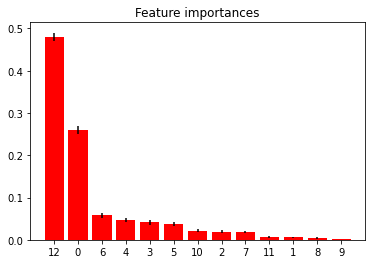

In [32]:
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
# Print the feature ranking
print("Feature ranking:")

columns = X_train.columns.values

for f in range(X.shape[1]):
    print("%d. feature %d - %s (%f)" % (f + 1, indices[f], columns[indices[f]], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center",tick_label = X_train.columns.values)
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

Abel Stanley

13517068

# Week 13 Handson - Clustering
In this hands-on, we will empoy clustering technique to cluster data.

## Read the Dataset

Execute the following code to read the digit mnist dataset. The folder of `digit_mnist` dataset must be in the same directory with this ipynb file.

The dataset contains 500 digit handwritten images from 5 different classes/labels (0, 1, 2, 3, 4). The first 100 images have label of 0, the second 100 images have label of 1, and so on, until the fifth 100 images have label of 4.

In [66]:
# membaca library yang dibutuhkan
import numpy as np #library untuk komputasi matriks
import cv2 #library untuk memproses gambar/video
import matplotlib.pyplot as plt #library untuk plot data (visualisasi)
import os
import pandas as pd

# fungsi untuk membaca gambar (digit MNIST) ke matriks numpy per folder
def baca_image(folder_image):
    count = 0;
    list_nama_image= os.listdir(folder_image)
    list_path_image = [os.path.join(folder_image, i) for i in list_nama_image]
    all_image = np.ndarray(shape=(0,28*28))
    for i in list_path_image:
        image = cv2.imread(i, 0) #baca image menggunakan OpenCV API dalam gray image (0=gray, 1=berwarna).
        image_reshaped = image.reshape((1, -1))
        all_image = np.concatenate((all_image, image_reshaped), axis=0)
        count = count + 1
        if count >= 100:
            break
    return all_image
        
# menggunakan fungsi yg telah dibuat untuk membaca image MNIST '0' sampai '4' 
for angka in range(5):
    file = "digit_mnist/" + str(angka)
    digit = baca_image(file)
    if angka == 0:
        X = digit
    else :
        X = np.concatenate((X, digit), axis=0)

print("shape:", X.shape)

shape: (500, 784)


## Milestone 01 (M01)
In this milestone, you are asked to empoy clustering method to cluster the digit MNIST read above, into 5 clusters. The output of this milestone is clustered data. You may use any clustering method from any library you want.

In [67]:
#your answer for M01
# LIBS:
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

Preprocessing:

In [68]:
# Preprocessing:
# convert each image to 1 dimensional array

X_ = X.reshape(len(X),-1)
y_ = []
for i in range(5):
    y_ += [i for _ in range(100)]
y_ = np.array(y_)

# normalize the data to 0 - 1

X = X.astype(float) / 255.

print(X.shape)
print(X[0].shape)
print(y_.shape)

(500, 784)
(784,)
(500,)


Clustering with sklearn's MiniBatchKMeans

In [69]:
from sklearn.cluster import MiniBatchKMeans

n_digits = len(np.unique(y_))
print(n_digits)

# Initialize KMeans model

kmeans = MiniBatchKMeans(n_clusters = n_digits)

# Fit the model to the training data

kmeans.fit(X_)
display(kmeans.labels_)

5


array([2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 3, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 0, 1, 0, 3, 0, 0, 4, 0, 0, 3, 0, 4, 4, 0, 4, 0, 4, 0, 0, 4,
       0, 0, 4, 4, 0, 0, 0, 0, 0, 1, 0, 3, 0, 0, 0, 4, 0, 3, 4, 0, 1, 0,
       0, 4, 0, 4, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       4, 3, 4, 4, 0, 0, 0, 0, 0, 0, 1, 0, 4, 0, 1, 1, 4, 0, 0, 4, 0, 0,
       0, 0, 0, 0, 0, 4, 0, 1, 0, 0, 0, 0, 1, 0, 0,

In [70]:
# import matplotlib
# fig = plt.figure(figsize=(8,8))
# colors = ['orange','blue','purple','green', 'red']
# colored = [colors[k] for k in kmeans.labels_]
# print (colored[0:10])
# plt.scatter(X_[4],X_[1],  color = colored)
# for ci,c in enumerate(kmeans.cluster_centers_):
#     plt.plot(c[0], c[1], 'o', markersize=8, color='red', alpha=0.9, label=''+str(ci))

# plt.xlabel('x_values')
# plt.ylabel('y_values')
# plt.legend()
# plt.show()

## M02
Evaluate the clustering results in M01, as follows.
1. For each cluster, take the dominant class. E.g., in cluster 1, 96% data are digit 3 images, thus, all images in the cluster 1 have class prediction of 3 (digit 3). Likewise for other clusters.
2. With that prediction ouput, evaluate the clustering result using metrics of: (i) accuracy, (ii) precision: $TP/pred. yes$ and recall$: TP/actual yes$ for each class.
3. Print the metrics you get in (2).

In [71]:
#your answer for M02
import math
n_sets = 100

pred_cluster = [[0 for j in range(n_digits)] for i in range(n_digits)]
for idx,label in enumerate(kmeans.labels_):
    pred_cluster[label][math.floor(idx/n_sets)] += 1

print(pred_cluster)
for idx,cluster in enumerate(pred_cluster):
    pred_cluster[idx] = pred_cluster[idx].index(max(pred_cluster[idx]))
    
print(pred_cluster) # contains 
    
math.ceil(101/100)

[[7, 2, 67, 13, 0], [1, 1, 8, 3, 95], [88, 0, 0, 0, 0], [4, 0, 6, 75, 0], [0, 97, 19, 9, 5]]
[2, 4, 0, 3, 1]


2

I've implemented my own accuracy, recall, and precision calculation. I will be comparing the result to sklearn's classification report to verify it is working as intended.

In [101]:
def make_predictions(pred_cluster,labels):
    pred = []
    for i in range(len(labels)):
        pred.append(pred_cluster[labels[i]])
    return pred

def accuracy(pred, truth):
    count = 0
    for i in range(len(pred)):
        if(pred[i] == truth[i]):
            count += 1
    return count/len(pred)

from collections import defaultdict
def calculate_conf_mat(pred, truth, target):
    conf_mat = defaultdict(lambda:0,{})
    for i in range(len(pred)):
        if(pred[i] == target and truth[i] == target):
            conf_mat['tp'] += 1
        elif (pred[i] == target and truth[i] != target):
            conf_mat['fp'] += 1
        elif(pred[i] != target and truth[i] != target):
            conf_mat['tn'] += 1
        elif(pred[i] != target and truth[i] == target):
            conf_mat['fn'] += 1
    return conf_mat
    
def precision(conf_mat):
    return conf_mat['tp'] / (conf_mat['tp'] + conf_mat['fp'])

def recall(conf_mat):
    return conf_mat['tp'] / (conf_mat['tp'] + conf_mat['fn']) #focus on actual positives

print('Shapes:')
final_preds = make_predictions(pred_cluster, kmeans.labels_)
print(np.array(final_preds).shape, y_.shape, kmeans.labels_.shape)
print('----------------------------------------------------------')
print('Accuracy',accuracy(final_preds, y_))
score = accuracy_score(y_,final_preds)
print('sklearn metric accuracy score:', score)
print('----------------------------------------------------------')

for i in range(n_digits):
    conf_mat = calculate_conf_mat(final_preds, y_, i)
    print('==================================================')
    print('evaluation for', i, 'digit')
    print(conf_mat)
    print('precision:', precision(conf_mat))
    print('recall:', recall(conf_mat))
    print('==================================================')

Shapes:
(500,) (500,) (18484,)
----------------------------------------------------------
Accuracy 0.844
sklearn metric accuracy score: 0.844
----------------------------------------------------------
evaluation for 0 digit
defaultdict(<function calculate_conf_mat.<locals>.<lambda> at 0x0000023C38B010D0>, {'tp': 88, 'fn': 12, 'tn': 400})
precision: 1.0
recall: 0.88
evaluation for 1 digit
defaultdict(<function calculate_conf_mat.<locals>.<lambda> at 0x0000023C38B01F28>, {'tn': 367, 'tp': 97, 'fn': 3, 'fp': 33})
precision: 0.7461538461538462
recall: 0.97
evaluation for 2 digit
defaultdict(<function calculate_conf_mat.<locals>.<lambda> at 0x0000023C389EE400>, {'tn': 378, 'fp': 22, 'tp': 67, 'fn': 33})
precision: 0.7528089887640449
recall: 0.67
evaluation for 3 digit
defaultdict(<function calculate_conf_mat.<locals>.<lambda> at 0x0000023C38AD31E0>, {'tn': 390, 'fp': 10, 'fn': 25, 'tp': 75})
precision: 0.8823529411764706
recall: 0.75
evaluation for 4 digit
defaultdict(<function calculate_co

with sklearn's classification report

In [93]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_, final_preds)

In [97]:
FP = conf_mat.sum(axis=0) - np.diag(conf_mat)  
FN = conf_mat.sum(axis=1) - np.diag(conf_mat)
TP = np.diag(conf_mat)
TN = conf_mat.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

print(TP,TN, FP, FN)
print(TPR)

[88 97 67 75 95] [400 367 378 390 387] [ 0 33 22 10 13] [12  3 33 25  5]
[0.88 0.97 0.67 0.75 0.95]


In [98]:
print(classification_report(y_, final_preds))

              precision    recall  f1-score   support

           0       1.00      0.88      0.94       100
           1       0.75      0.97      0.84       100
           2       0.75      0.67      0.71       100
           3       0.88      0.75      0.81       100
           4       0.88      0.95      0.91       100

    accuracy                           0.84       500
   macro avg       0.85      0.84      0.84       500
weighted avg       0.85      0.84      0.84       500



## M03

Suppose you are working for goverment that they want to lauch development program to society. The program is expected to empower the society to improve their welfare. Given sample dataset of `people.csv` (provided in the zip), you are asked to segment the data. The data attibutes are: name, age, marital status, income range, gender, total children, children at home, education, occupation, home owner, cars. You may define your own variables, such as the number of segments, attributes that are used, etc. Please provide your arguments of choosing those variables, and show (or visualize) the segments you create, including at least brief explanation.

In [74]:
#your answer for M03
df = pd.read_csv('people.csv', engine='python')

### EDA

In [75]:
df.head()

,Name,Age,MaritalStatus,IncomeRange,Gender,TotalChildren,ChildrenAtHome,Education,Occupation,HomeOwner,Cars
0,Aaron Adams,42,0,50000,0,0,0,3,2,1,1
1,Aaron Alexander,40,1,50000,0,0,0,2,2,1,2
2,Aaron Allen,63,0,25000,0,2,1,2,1,1,2
3,Aaron Baker,56,1,50000,0,4,2,2,2,1,2
4,Aaron Bryant,72,0,75000,0,4,0,4,4,1,2


In [76]:
df.shape

(18508, 11)

#### Check Age distribution

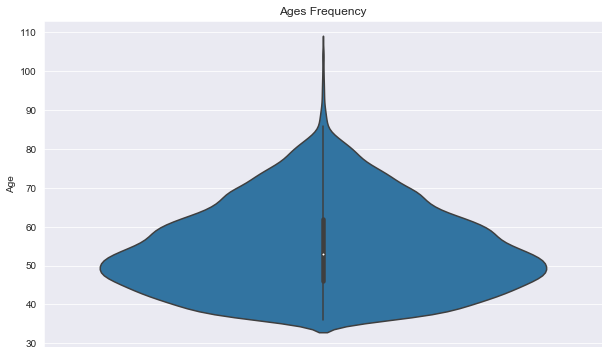

In [77]:
plt.figure(figsize=(10,6))
plt.title("Ages Frequency")
sns.axes_style("dark")
sns.violinplot(y=df["Age"])
plt.show()

'people.csv' seems to consist of old people... interesting.

#### Check age group distribution

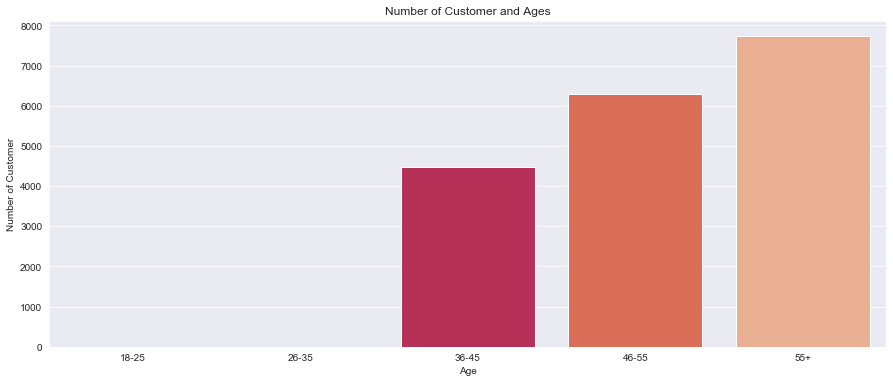

In [78]:
age18_25 = df.Age[(df.Age <= 25) & (df.Age >= 18)]
age26_35 = df.Age[(df.Age <= 35) & (df.Age >= 26)]
age36_45 = df.Age[(df.Age <= 45) & (df.Age >= 36)]
age46_55 = df.Age[(df.Age <= 55) & (df.Age >= 46)]
age55above = df.Age[df.Age >= 56]

x = ["18-25","26-35","36-45","46-55","55+"]
y = [len(age18_25.values),len(age26_35.values),len(age36_45.values),len(age46_55.values),len(age55above.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("Number of Customer and Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customer")
plt.show()

Most people in people.csv is 55+ years old or older!

#### Explore the distribution of IncomeRange

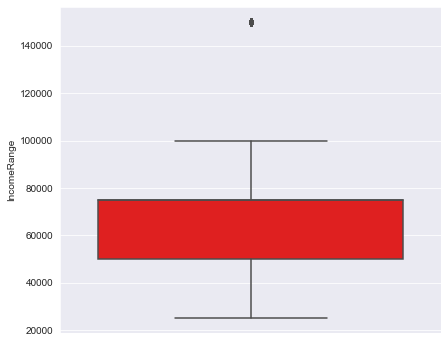

In [79]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.boxplot(y=df["IncomeRange"], color="red")
plt.show()

The standard deviation of Income Range is quite high. The gap between Minimum (Q1 - 1.5*IQR) and Maximum (Q3 + 1.5 * IQR) is quite large (80k).

There are also some outliers there with 140k ++ income.

Most people then to sit aroung 62.5k income range.

#### Explore the distribution of Gender

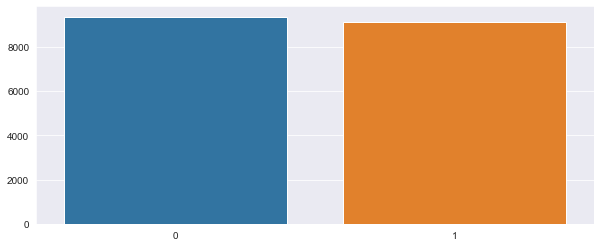

In [80]:
genders = df.Gender.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=genders.index, y=genders.values)
plt.show()

Assumption: 0 is Male and 1 is Female. Thus the dataset has slightly more entries on male than females. The difference is minor though. We can assume that the dataset is balanced on this feature.

#### Explore the distribution of Total Children

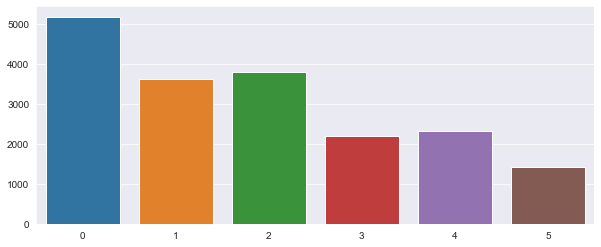

In [81]:
totalchildren = df.TotalChildren.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=totalchildren.index, y=totalchildren.values)
plt.show()

There are more people with children than the people without. People who decide to have children tend to have only 2 children.

#### Explore the distribution of Children at Home

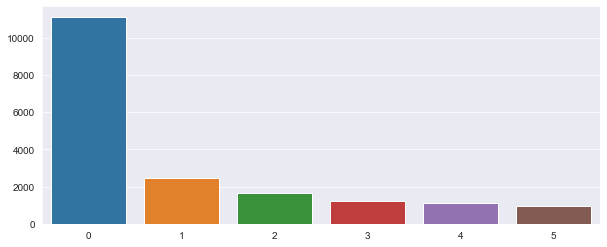

In [82]:
childrenAtHome = df.ChildrenAtHome.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=childrenAtHome.index, y=childrenAtHome.values)
plt.show()

Turns out that most of the children are not at home anymore. Maybe it's because they have turned adult already since we have established that people.csv mostly consisted of the elderly.

#### Explore the distribution of Education

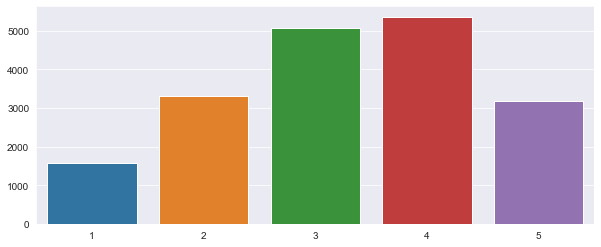

In [83]:
education = df.Education.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=education.index, y=education.values)
plt.show()

Assuming that this column is ordinal, higher value means higher education level. Based on the distribution above, the people here seems to be well educated (in 3-4 range).

#### Explore the distribution of HomeOwner

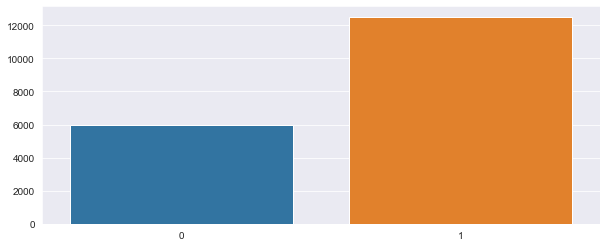

In [84]:
homeOwner = df.HomeOwner.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=homeOwner.index, y=homeOwner.values)
plt.show()

Wealthy people indeed. People who have homes doubled in number compared to people who don't.

#### Explore the distribution of Cars

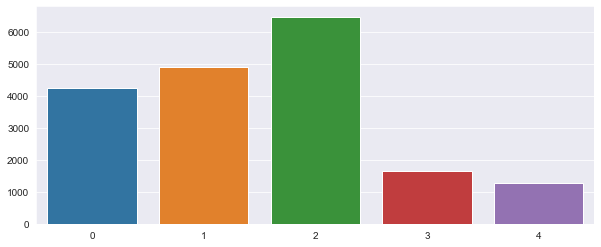

In [85]:
cars = df.Cars.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=cars.index, y=cars.values)
plt.show()

There are far more people with at least one car than people without one. Very prosperous lives I must say.

### Preprocessing!

In [86]:
print('Duplicate Entries: {}'.format(df.duplicated().sum()))
df.drop_duplicates(inplace = True)
print('Duplicate Entries After dropping: {}'.format(df.duplicated().sum()))

Duplicate Entries: 24
Duplicate Entries After dropping: 0


In [87]:
print('Duplicate Entries After dropping: {}'.format(df.duplicated().sum()))

Duplicate Entries After dropping: 0


### Segmentation!

##### WCSS
Use WCSS (Within Cluster Sum Of Squares) plotted against number of clusters (K val) to find out the most optimal number of clusters to be used.

The formula is given below:

WCSS measures sum of distances of observations from their cluster centroids.
WCSS = Sigma(Xi - Yi)^2

Yi is centroid for Xi observation. The objective is to maximize the number of clusters and limit cases where each data point becomes its own cluster centroid.

#### The Elbow Method
Calculate the Within Cluster Sum of Squared Errors (WSS) for different values of k, and choose the k for which WSS first starts to diminish. In the plot of WSS-versus k, this is visible as an elbow.

Steps:

1. Compute K-Means clustering for different values of K by varying K from 1 to 10 clusters.

2. For each K, calculate the total within-cluster sum of square (WCSS).

3. Plot the curve of WCSS vs the number of clusters K.

4. The location of a bend (knee) in the plot is generally considered as an indicator of the appropriate number of clusters.

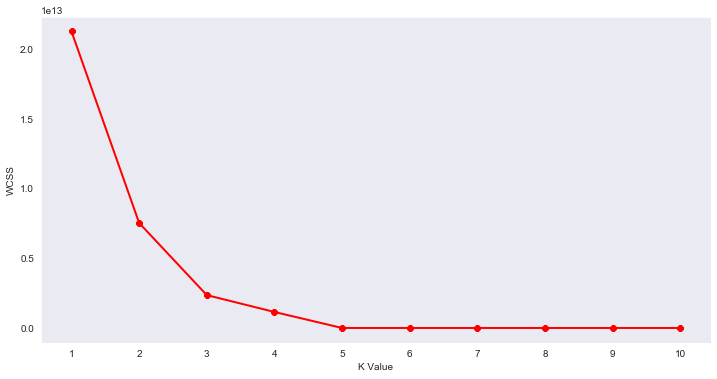

In [88]:
from sklearn.cluster import KMeans
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(df.iloc[:,1:]) # name column is irrelevant
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

Judging from the graph above as the result of the **elbow method**, the optimal cluster num is **5**!

Because we want to improve welfare, we might want to look into government programmes which focus on **how we can enforce socio-economic equity in the society**.

Based on EDA carried out above we can conclude that:
1. Most people are elderly
2. There are lots of wealthy and prospering people proven by:
    - The number of people with cars far outweighs people without
    - The average educational level is 3 to 4
    - The number of people who own a house far outweighs people without
    - There are some people who have relatively very high income around 140k++ (outliers)
3. Also we discovered that there are a very glaring gap in socio-economic standings (and also some interesting points?):
    - The standard deviation, gap between min and max income range is very high (around 80k)
    - There are some people with level 1 education
    - There also around 6k people without home even though the data mostly consisted of old people
    - There are relatively high number of people (around 5k) without child even though the data mostly consisted of old people (I understand that not everybody wants to have a child, but this is an interesting point nonetheless).
    
4. Therefore, we would want to make segments that differentiate between those already wealthy and propsering to those who are stil struggling (relative to them), especially in old age.

Because visualization is best done in 3D (still visually understandable), I propose using these 3 variables to find out the people who needs governmental help the most:

1. **Age**

People at old age might not be able to support their family and themselves as well compared to those still in their prime. Elders are also more likely to suffer from health complication which supports my argument further.

2. **IncomeRange**

We aim to help people within lower income range to stablize against those within higher income range.

3. **ChildrenAtHome**

People with more children at home means that they have more heads to feed, thus requiring more funds to get by. This in turn helps us to locate which families in dire need of welfare support.

We will cluster the data into **5 clusters**, following the result gotten from the elbow method above.

3D plot to visualize:

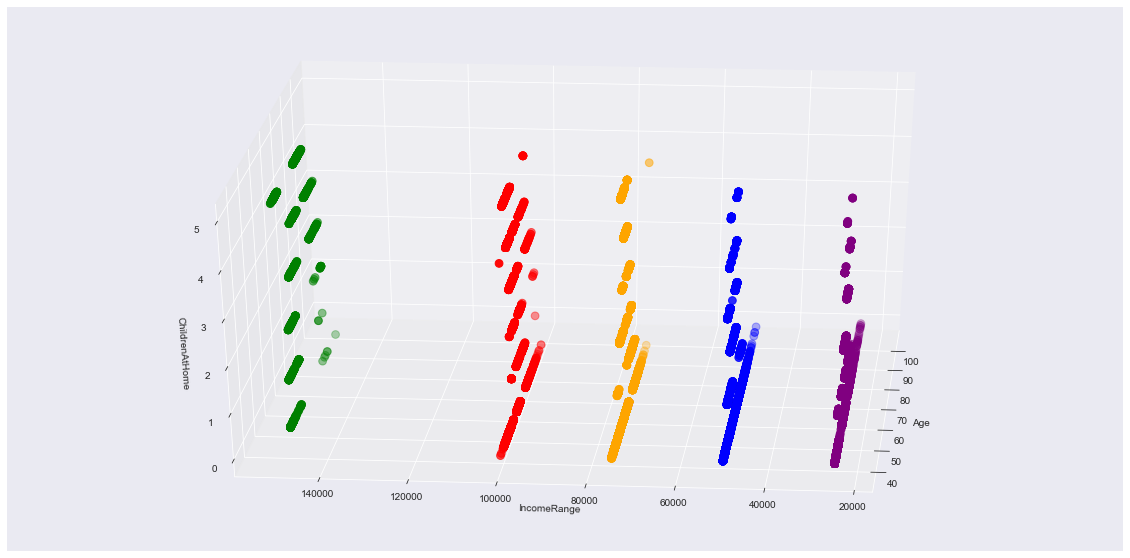

In [89]:


km = KMeans(n_clusters=5)
clusters = km.fit_predict(df.iloc[:,1:])
df["label"] = clusters

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Age[df.label == 0], df["IncomeRange"][df.label == 0], df["ChildrenAtHome"][df.label == 0], c='blue', s=60)
ax.scatter(df.Age[df.label == 1], df["IncomeRange"][df.label == 1], df["ChildrenAtHome"][df.label == 1], c='red', s=60)
ax.scatter(df.Age[df.label == 2], df["IncomeRange"][df.label == 2], df["ChildrenAtHome"][df.label == 2], c='green', s=60)
ax.scatter(df.Age[df.label == 3], df["IncomeRange"][df.label == 3], df["ChildrenAtHome"][df.label == 3], c='orange', s=60)
ax.scatter(df.Age[df.label == 4], df["IncomeRange"][df.label == 4], df["ChildrenAtHome"][df.label == 4], c='purple', s=60)
ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("IncomeRange")
ax.set_zlabel('ChildrenAtHome')
plt.show()

So, the target of our segmentation resides in the color green; people who have low income, high number of children, and in old age.